<b>Data mining project - 2020/21</b><br>
<b>Authors</b>: [Alexandra Bradan](https://github.com/alexandrabradan), [Marianna Abbattista](https://github.com/Mariabba), [Eleonora Cocciu](https://github.com/eleonoracocciu) and [Dafina Leva](https://github.com/dafina-95)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 20/11/2020<b>

In [2]:
%matplotlib inline

# general libraries
import sys
import math
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import defaultdict

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

In [3]:
data_directory = "../../../data/"
plot_directory = "../../../plots/DataUnderstanding/"
TR_file = data_directory + "Train_HR_Employee_Attrition.csv"
TS_file = data_directory + "Test_HR_Employee_Attrition.csv"
impunted_TR_file = data_directory + "Impunted_Train_HR_Employee_Attrition.csv"
clean_TR_file = data_directory + "Cleaned_Train_HR_Employee_Attrition.csv"
clean_norm_TR_file = data_directory + "Cleaned_Normalized_Train_HR_Employee_Attrition.csv"
num_norm_TR_file = data_directory + "Numerical_Normalized_Train_HR_Employee_Attrition.csv"
cat_normTR_file = data_directory + "Categorical_Normalized_Train_HR_Employee_Attrition.csv"
checking_TR_file = data_directory + "Checking_Train_HR_Employee_Attrition.csv"

In [4]:
df_impunted = pd.read_csv(impunted_TR_file)

In [5]:
df_impunted = pd.read_csv(impunted_TR_file)
df_cleaned = pd.read_csv(clean_TR_file)
df_num = pd.read_csv(clean_norm_TR_file)

In [6]:
df_checking = pd.read_csv(checking_TR_file)

In [7]:
df_probe = df_cleaned.copy()

del df_probe["Attrition"]
del df_probe["BusinessTravel_Non-Travel"]
del df_probe["BusinessTravel_Travel_Rarely"]
del df_probe["BusinessTravel_Travel_Frequently"]
del df_probe["JobRole_Healthcare_Representative"]
del df_probe["JobRole_Human_Resources"]
del df_probe["JobRole_Laboratory_Technician"]
del df_probe["JobRole_Manager_Research_&_Development"]
del df_probe["JobRole_Manager_Human_Resources"]
del df_probe["JobRole_Manager_Sales"]
del df_probe["JobRole_Manufacturing_Director"]
del df_probe["JobRole_Research_Director"]
del df_probe["JobRole_Sales_Representative"]
del df_probe["JobRole_Research_Scientist"]
del df_probe["JobRole_Sales_Executive"]

del df_probe["Gender"]
del df_probe["Education"]
del df_probe["OverTime"]
# del df_probe["JobLevel"]

del df_probe["JobInvolvement"]
del df_probe["JobSatisfaction"]
del df_probe["EnvironmentSatisfaction"]
del df_probe["RelationshipSatisfaction"]
del df_probe["WorkLifeBalance"]

del df_probe["Age"]
del df_probe["TaxRate"]
del df_probe["MonthlyHours"]

# maybe to keep (less restrictive)
del df_probe["TrainingTimesLastYear"]
del df_probe["PercentSalaryHike"]
del df_probe["MonthlyIncome"]

# maybe to keep
del df_probe["NumCompaniesWorked"]

# NOT TO REMOVE
del df_probe["DistanceFromHome"]
# del df_probe["YearsAtCompany"]
# del df_probe["YearsInCurrentRole"]
# del df_probe["OverallSatisfaction"]

In [8]:
df_probe.head()

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
0,3,0,8,7,2.6
1,5,1,1,8,2.8
2,2,1,1,5,3.2
3,1,0,3,7,2.4
4,1,0,10,2,3.2


In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_norm_minmax = minmax_scaler.fit_transform(df_probe.values)

<h2>K-means </h2>
Identification of the best value of k
The value of k is the main parameter of the algorithm and represents the number of clusters that we want to split the dataset into. There are several techniques to identify the optimal value of said parameter. Our aim in this context is to run multiple executions of the algorithm, each with a different value for k, and then performing an evaluation analysis.

We start from an initial value of 2 and we keep computing the clusterization until we reach the value of 20, our choice for the maximum value of k.
As already mentioned, these values act as the fisrt parameter, n_clusters, for the K-means algorithm.
The second parameter, n_init, is kept at its default value of 10. This means that, for each value of k, K-means will try ten different sets of randomly picked initial centroids.
Finally, the third parameter max_iter, which is the maximum number of iterations of the algorithm for a single run, is set to 100 (default value: 300).

The <b>Inertia (Sum of Squared Errors)</b> and the <b>Silhouette scores</b> are computed and stored for each run. Both of them are utilized within the evaluation process described in the following subsections.

In [10]:
from sklearn.cluster import KMeans # we import the Sklearn implementation of the algorithm
from sklearn.metrics import silhouette_score 

max_k = 20
sse= []
silhouette = []

for k in range(2, max_k):
    # Initializing K-means parameters
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_norm_minmax) # performing K-means clustering
    
    sse.append(kmeans.inertia_) # storing the distorsion values
    silhouette.append(silhouette_score(df_probe, kmeans.labels_)) # storing the silhouette scores

In [11]:
for i in range(0, len(sse)):
    print(i, sse[i], sep="\t")

0	186.2539640163472
1	146.04796358150327
2	126.8982827185289
3	115.11163168817002
4	105.95495808753705
5	98.31762415771799
6	93.06150531353397
7	88.4795234183017
8	84.1731665194307
9	80.17436492721615
10	77.2191424430055
11	75.11755652314321
12	72.45671486258213
13	69.74873750317636
14	68.36292567710656
15	65.86470740851522
16	63.019640853536906
17	60.868810824840416


In [12]:
for i in range(0, len(silhouette)):
    print(i, silhouette[i], sep="\t")

0	0.10688070331129944
1	0.08477470326359535
2	0.16035250868560388
3	0.16165332628994647
4	0.03372613964574082
5	0.03581647825607972
6	0.0397143667035707
7	0.02828608458868098
8	-0.0022385738403057722
9	-0.007834419425604321
10	-0.0022385125993969073
11	0.00039912569570789495
12	-0.018939978498911984
13	-0.0034358425776401624
14	-0.026138722470938458
15	-0.021011379018666315
16	-0.016212302036310897
17	-0.04208456533663187


<h6>Elbow Method on the clusters Inertia</h6>

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters k in a data set. It consists of plotting the SSE as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

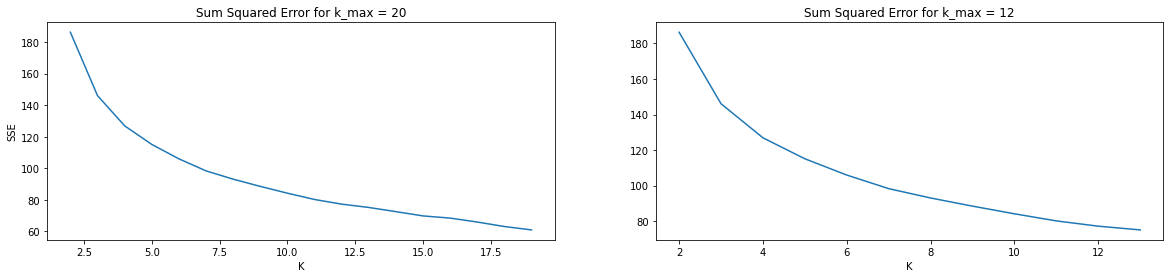

In [13]:
# print the elbow plots
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
visual_max_k = [20, 12]
for i in range(2):
    axs[i].plot(range(2, len(sse[0:visual_max_k[i]]) + 2), list(sse[0:visual_max_k[i]]))
    axs[i].set_title('Sum Squared Error for k_max = ' + str(visual_max_k[i]))
    axs[i].set_xlabel('K')
axs[0].set_ylabel('SSE')

"""axs[1].plot([3], [sse[1]], marker='.', c='r')
axs[1].plot([6], [sse[4]], marker='.', c='r')
axs[1].plot([9], [sse[7]], marker='.', c='r')
axs[1].plot([12], [sse[10]], marker='.', c='r')"""

plt.show()

The graphs above display how the inertia seems to behave less linearly between 3 and 8. This means that 3, 5 or 8 could be potential candidate for the optimal K.

<h6> Average Silhouette Method </h6>
The silhouette score is a indicator of both separation and cohesion among clusters. It is a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. The Silhouette Coefficient is calculated using:

- the mean intra-cluster distance (a): mean distance between the observation and all other data points in the same cluster;
- the mean nearest-cluster distance (b): mean distance between the observation and all other data points of the next nearest cluster.

for each sample. The Silhouette Coefficient for a sample is defined as:

$$\dfrac{(b - a)}{max(a, b)}$$.

In order to maximise the silhouette score (a) need to be small and (b) high.

Here we look for the clusterization with the maximum Silhouette score among those computed by K-means.

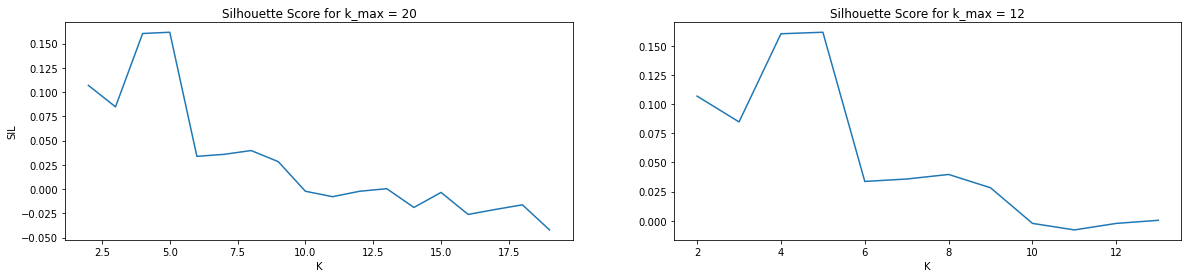

In [14]:
# Create two subplots and unpack the output array immediately
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
visual_max_k = [20, 12]
for i in range(len(visual_max_k)):
    axs[i].plot(range(2, len(silhouette[0:visual_max_k[i]]) + 2), silhouette[0:visual_max_k[i]])
    axs[i].set_title('Silhouette Score for k_max = ' + str(visual_max_k[i]))
    axs[i].set_xlabel('K')
axs[0].set_ylabel('SIL')

"""axs[1].plot([2], [silhouette[0]], marker='.', c='r')
axs[1].plot([3], [silhouette[1]], marker='.', c='r')
axs[1].plot([6], [silhouette[4]], marker='.', c='r')
axs[1].plot([9], [silhouette[7]], marker='.', c='r')
axs[1].plot([12], [silhouette[10]], marker='.', c='r')"""

plt.show()

The Average Silhouette method suggest 2, the point with the maximum score, as the optimal value for the k parameter. Also, the scores for k equals to both 3, 4, 5 and 7 and 12 seems to representes small local maximas.

<h6> Insights from Hierarchical Clustering </h6>
Here we try to identify the optimal number of clusters by analysing the hierarchical clustering performed throught the Ward method. Said method aims at the local optimization of the SSE fuction and therefore it is often used in conjunction with K-means.

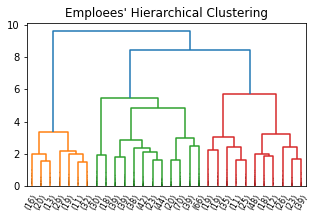

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

gig = plt.figure(figsize=(5, 3))
plt.title("Emploees' Hierarchical Clustering")
plt.axhline(y=80, ls='--', c='red')
dend = dendrogram(linkage(df_norm_minmax, method='ward'), truncate_mode='lastp', p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)
plt.show()

The clustering obtained throught the Ward linkage seems to suggest the presence of two main clusters within the dataset, a smaller one and a  bigger one, further split in two subclusters.
The optimal k to test are k=2, 3, 4, 5, 7.

<h6>Elbow Method and Silhouette Methon comparison </h6>

We prepare a graph comparing the results from the Elbow Method and the analysis of the Silhouette scores.

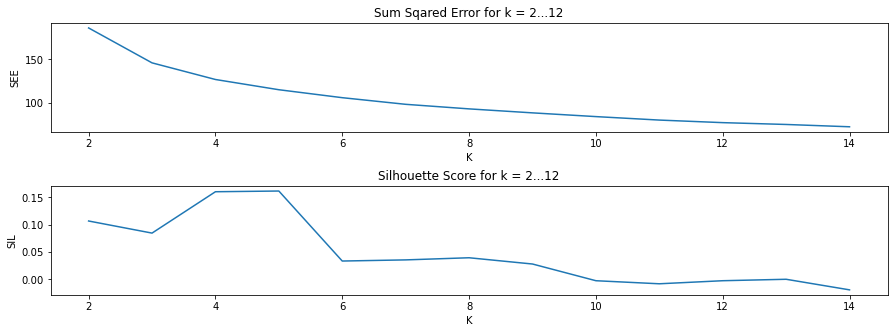

In [16]:
# Create two subplots and unpack the output array immediately
f, axs = plt.subplots(nrows=2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
axs[0].plot(range(2, len(sse[0:13]) + 2), sse[0:13])
axs[0].set_title('Sum Sqared Error for k = 2...12')
axs[0].set_ylabel('SEE')
axs[1].set_xlabel('K')
"""axs[0].plot([3], [sse[1]], marker='.', c='r')
axs[0].plot([6], [sse[4]], marker='.', c='r')
axs[0].plot([9], [sse[7]], marker='.', c='r')
axs[0].plot([12], [sse[10]], marker='.', c='r')"""

axs[1].plot(range(2, len(silhouette[0:13]) + 2), silhouette[0:13])
axs[1].set_title('Silhouette Score for k = 2...12')
axs[1].set_ylabel('SIL')
axs[0].set_xlabel('K')
"""axs[1].plot([2], [silhouette[0]], marker='.', c='r')
axs[1].plot([3], [silhouette[1]], marker='.', c='r')
axs[1].plot([6], [silhouette[4]], marker='.', c='r')
axs[1].plot([9], [silhouette[7]], marker='.', c='r')
axs[1].plot([12], [silhouette[10]], marker='.', c='r')"""

plt.show()

According to both methods the values 2, 3, 4 and 5 could be plausible candidates for the role of optimal k. Additionally, the value 2 and 3 stand as the most promising candidates according to their Silhouette score, while for the SSE 3 and 4 are the most outstanding. The former is also supported by the dendrogram previously displayed.

Ultimately, we decide to compute six different clustering, each associated with a potential candidate, and to leave the choice for the best k to after an evaluation process on the results obtained.

In [17]:
Ks = [2, 3, 4, 5, 6, 7, 11]

<h2>Clustering by K-means</h2> 

We perform the clustering for the four values of k previously picked.
For each k we store the information regarding the centroids, the SSE values associated with the clustering and, most importantly, the labels associating each record to its cluster.

In [18]:
centers = []
labels = []
inertia = []
for k in Ks:
    # Initializing K-means parameters
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100) 
    kmeans.fit(df_norm_minmax) # we perform the clusterin for each value of k
    centers.append(minmax_scaler.inverse_transform(kmeans.cluster_centers_)) # we store the coordinates of the centroids
    labels.append(kmeans.labels_) # we store the labels associated with the records
    inertia.append(kmeans.inertia_) # we store the SSE value associated with the clustering

In [19]:
# Saving record's cluster labels
for i in range(len(Ks)):
    df_cleaned['C' + str(Ks[i])] = labels[i]
    df_impunted['C' + str(Ks[i])] = labels[i]
df_cleaned.head()

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyHours,TaxRate,OverallSatisfaction,C2,C3,C4,C5,C6,C7,C11
0,52,0,0,1,0,9,4,2,0,3,...,156.613636,0.387172,2.6,1,1,2,4,5,6,7
1,36,0,0,1,0,1,1,2,0,3,...,157.942308,0.411421,2.8,0,1,2,0,4,4,4
2,25,0,0,0,1,16,3,3,0,3,...,448.055556,0.704402,3.2,0,2,0,3,2,2,6
3,33,0,0,1,0,5,4,2,0,3,...,271.907692,0.841632,2.4,1,2,0,3,3,1,3
4,31,0,0,1,0,9,2,3,1,3,...,106.373333,0.207947,3.2,1,2,3,2,3,1,1


<h2> Clustering results evaluation </h2>
At this point, we are going to use well-known metrics in order to evalueate the clustering obtained with our four versions of k-means. Doing this will grant us a numerical expression of the overall "goodness" of the arrangements of out clusters and, again, it'll guide our choice toward which one is the best number of clusters for the optimal partition of this dataset.

The (internal) evaluation metrics that we are going to compute are:

SSE to measure cohesion
Silhouette Score to measure them both
Davies Bouldin Score to measure separation
Calinski_harabasz_score to measure variance ratio 

In [20]:
def draw_scores(k, silhouette,  separation, variance_ratio, method):
    fig = plt.subplots(figsize=(20, 5))
    fig_dims = (1, 3)
    
    ax = plt.subplot2grid(fig_dims, (0, 0))
    ax.plot(k, silhouette)
    plt.xlabel('K')
    plt.ylabel('SIL')
    plt.title('Silhouette Score for ' + str(method))
    
    ax = plt.subplot2grid(fig_dims, (0, 1))
    ax.plot(k, separation)
    plt.xlabel('K')
    plt.ylabel('SEP')
    plt.title('Separation Score for ' + str(method))
    
    ax = plt.subplot2grid(fig_dims, (0, 2))
    ax.plot(k, variance_ratio)
    plt.xlabel('K')
    plt.ylabel('VRC')
    plt.title('Variance Ratio Criterion Score for ' + str(method))
    
    plt.show()

In [21]:
def get_num_elements_in_each_cluster(cluster):
    tmp_df = df_cleaned.groupby(cluster).count()
    tmp_df2 = df_cleaned[df_cleaned["Attrition"] == 1].groupby(cluster).count()
    
    i = 0
    print("cluster " + str(cluster) + ":")
    for row, row2 in zip(tmp_df.itertuples(), tmp_df2.itertuples()):
        print(i, row.Age, "\tattrition", row2.Age)
        i += 1
    print()

for k in Ks:
    cluster = "C" + str(k)
    get_num_elements_in_each_cluster(cluster)

cluster C2:
0 320 	attrition 28
1 563 	attrition 125

cluster C3:
0 147 	attrition 17
1 265 	attrition 21
2 471 	attrition 115

cluster C4:
0 338 	attrition 67
1 145 	attrition 17
2 208 	attrition 15
3 192 	attrition 54

cluster C5:
0 106 	attrition 12
1 145 	attrition 17
2 181 	attrition 54
3 293 	attrition 60
4 158 	attrition 10

cluster C6:
0 77 	attrition 21
1 141 	attrition 17
2 178 	attrition 24
3 224 	attrition 67
4 104 	attrition 12
5 159 	attrition 12

cluster C7:
0 75 	attrition 9
1 220 	attrition 67
2 176 	attrition 24
3 141 	attrition 17
4 55 	attrition 5
5 75 	attrition 20
6 141 	attrition 11

cluster C11:
0 81 	attrition 11
1 105 	attrition 40
2 72 	attrition 14
3 140 	attrition 36
4 53 	attrition 5
5 56 	attrition 8
6 71 	attrition 4
7 123 	attrition 8
8 56 	attrition 3
9 84 	attrition 13
10 42 	attrition 11



In [22]:
print('Cohesion: ')
for i in range(len(Ks)):
    print('For K = '+ str(Ks[i])+': '+ str(inertia[i]))

Cohesion: 
For K = 2: 186.25396401634717
For K = 3: 146.04738665534464
For K = 4: 126.89727352945499
For K = 5: 115.12126713640598
For K = 6: 105.6966614103104
For K = 7: 98.4322477493561
For K = 11: 81.9537997395612


In [23]:
silhouette = [] 

print('Cohesion and Separation (Silhouette Score): ')
for i in range(len(Ks)):
    s = silhouette_score(df_norm_minmax, labels[i])
    silhouette.append(s)
    print('For K = '+ str(Ks[i])+': '+ str(s))

Cohesion and Separation (Silhouette Score): 
For K = 2: 0.2386224509060394
For K = 3: 0.2561270550227227
For K = 4: 0.2136550347933059
For K = 5: 0.21295273417985872
For K = 6: 0.198184199875763
For K = 7: 0.20693017998147317
For K = 11: 0.18846849477764172


In [24]:
from sklearn.metrics import davies_bouldin_score

separation = []
print('Separation (Davies Bouldin Score): ')
for i in range(len(Ks)):
    d = davies_bouldin_score(df_norm_minmax, labels[i])
    separation.append(d)
    print('For K = '+ str(Ks[i])+': '+ str(d))

Separation (Davies Bouldin Score): 
For K = 2: 1.7942502891523453
For K = 3: 1.4479024105354439
For K = 4: 1.4315746138764585
For K = 5: 1.5044323231086185
For K = 6: 1.4911598607692698
For K = 7: 1.4262843697296865
For K = 11: 1.4761233463034313


In [25]:
from sklearn.metrics import calinski_harabasz_score

variance_ratio = []
print(' Variance Ratio Criterion  (Calinski Harabasz Score): ')
for i in range(len(Ks)):
    c = calinski_harabasz_score(df_norm_minmax, labels[i])
    variance_ratio.append(c)
    print('For K = '+ str(Ks[i])+': '+ str(c))

 Variance Ratio Criterion  (Calinski Harabasz Score): 
For K = 2: 238.72878523114304
For K = 3: 273.18229776627584
For K = 4: 253.58410473002155
For K = 5: 231.8615874590255
For K = 6: 217.43483100115162
For K = 7: 205.1212563177823
For K = 11: 164.6773174202949


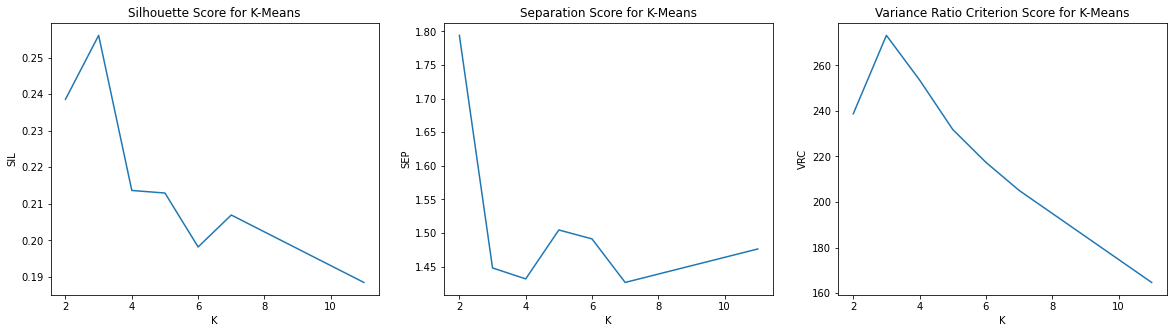

In [26]:
draw_scores(Ks, silhouette,  separation, variance_ratio, "K-Means")

In [27]:
best_k = 3
best_cluster = "C" + str(best_k)  # QUESTO !!! 
best_center_index = 1

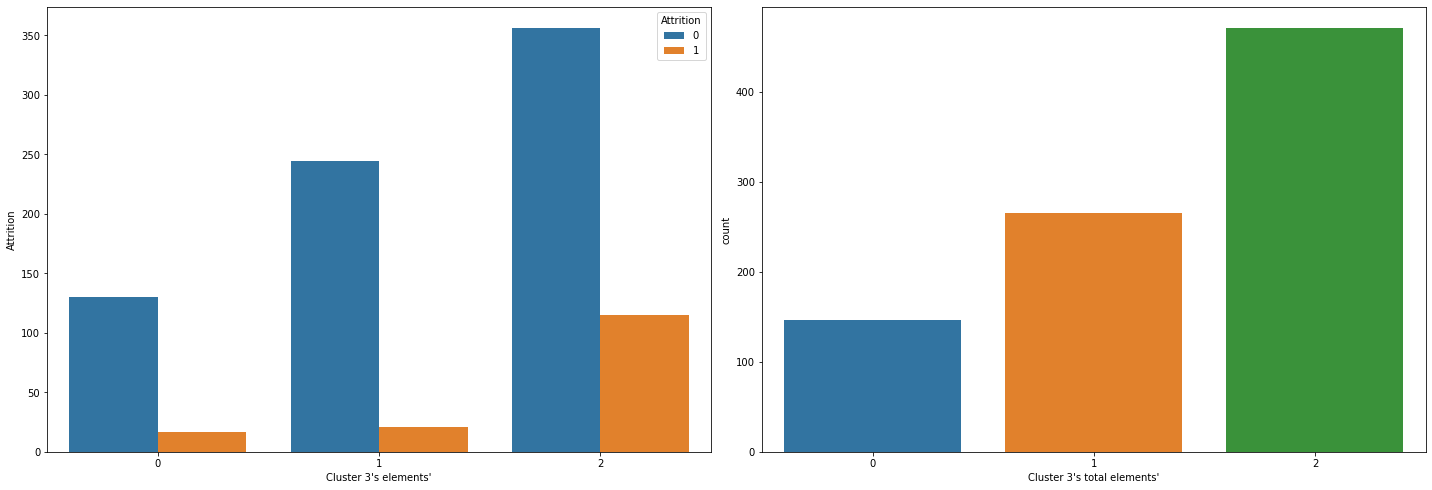

In [28]:
fig = plt.figure(figsize=(20,20))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0, 0))
b = sns.countplot(df_cleaned[best_cluster], hue=df_cleaned['Attrition'])
plt.xticks(rotation=0)
b.set_xlabel("Cluster " + str(best_k) + "'s elements'")
b.set_ylabel("Attrition")
b.tick_params()
b.legend_.set_title('Attrition')

tmpDF = df_cleaned[['StockOptionLevel', 'OverTime', best_cluster]]
# Plot completo con la distribuzione dei vari record all'interno dei vari cluster
plt.subplot2grid(fig_dims, (0, 1))
b = sns.countplot(x=best_cluster, data=tmpDF)
b.set_xlabel("Cluster " + str(best_k) + "'s total elements'")
b.set_ylabel("count")

plt.tight_layout()
plt.show() 

<h2> Visualizing the clusters and the centroids </h2>

We now exploit the bidimensional visualization in order to obtain a global view on the clusters and their population. For the sake of providing a meaningful visualization without overburdening the notebook, we build three series scatter plots for specific correlations between pairs of features.

Here you can clearly see the cluster separation and assignment in different colors, and also the centroids in red, so that is is immediate to understand and visualize where the center (i.e. the average value) is located for any cluster.

In [29]:
def draw_centroids(column_name1, column_name2, ax, c_index, best_c):
    a = df_probe.columns.get_loc(column_name1)
    b = df_probe.columns.get_loc(column_name2)
    ax.scatter(df_cleaned[column_name1], df_cleaned[column_name2], c=df_cleaned[best_c], s=200)
    for h in range(0, len(centers[c_index])):
        ax.scatter(centers[c_index][h][a], centers[c_index][h][b], s=200, marker='*', c='r')
    plt.title('Scatter(' + column_name1 + ' , ' + column_name2 + '): K = ' + str(best_c).replace("C", ""))
    plt.xlabel(column_name1)
    plt.ylabel(column_name2)

In [30]:
def draw_only_clustering(column_name1, column_name2, column_name3, ax, best_c):
    
    if column_name3 != "":
        ax.scatter(df_cleaned[column_name1], df_cleaned[column_name2], df_cleaned[column_name3],
                                                                               c=df_cleaned[best_cluster])
    else:
        ax.scatter(df_cleaned[column_name1], df_cleaned[column_name2], c=df_cleaned[best_c], s=100)
    plt.title('Scatter(' + column_name1 + ' , ' + column_name2 + '): K = ' + str(best_c).replace("C", ""))
    plt.xlabel(column_name1)
    plt.ylabel(column_name2)

<h6> k=2</h6>

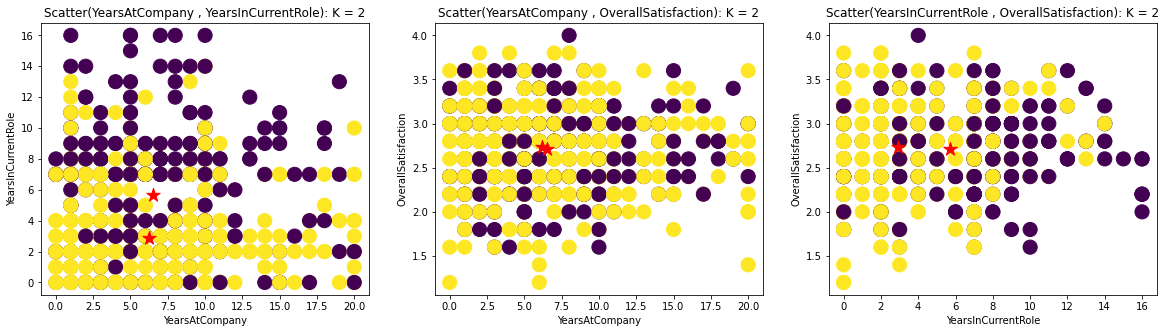

In [31]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "YearsInCurrentRole",  ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "OverallSatisfaction", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "OverallSatisfaction", ax, 0, "C2")

plt.show()

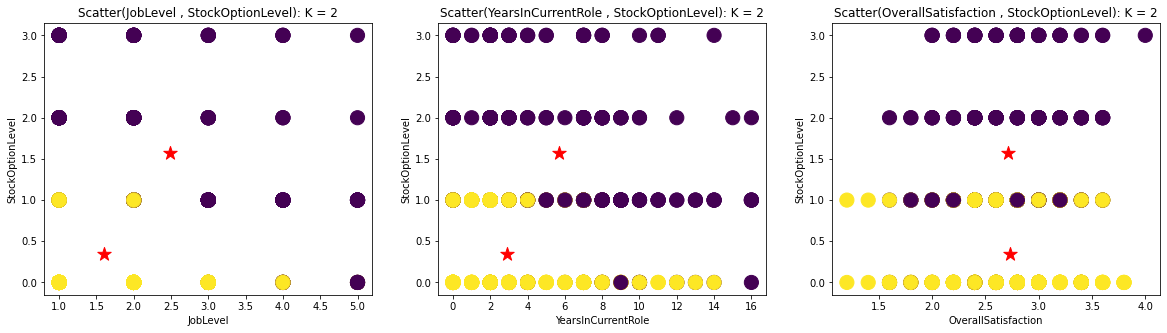

In [32]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("JobLevel", "StockOptionLevel", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsInCurrentRole", "StockOptionLevel", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("OverallSatisfaction", "StockOptionLevel", ax, 0, "C2")

plt.show()

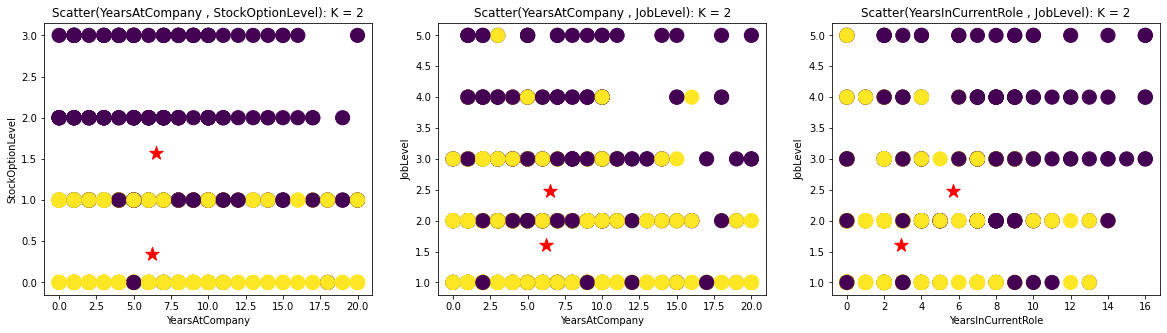

In [33]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "StockOptionLevel",  ax, 0, "C2")
 
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "JobLevel", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "JobLevel", ax, 0, "C2")


plt.show()

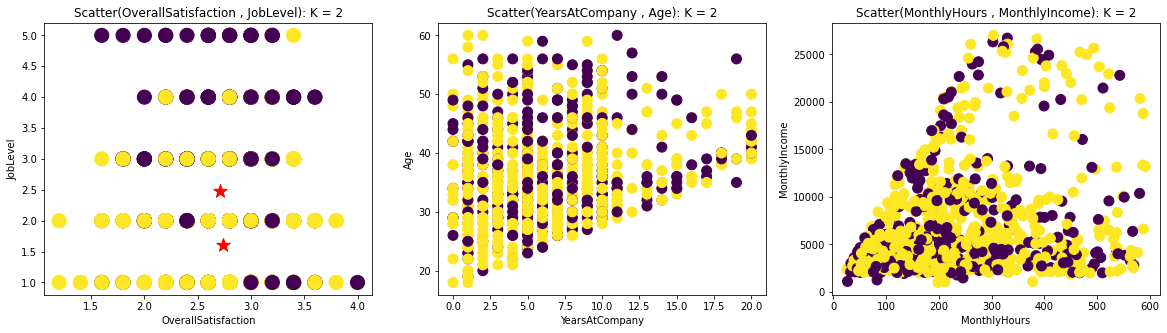

In [34]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("OverallSatisfaction", "JobLevel",  ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_only_clustering("YearsAtCompany", "Age", "", ax, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_only_clustering("MonthlyHours", "MonthlyIncome", "", ax, "C2")

plt.show()

<h6> k=3</h6>

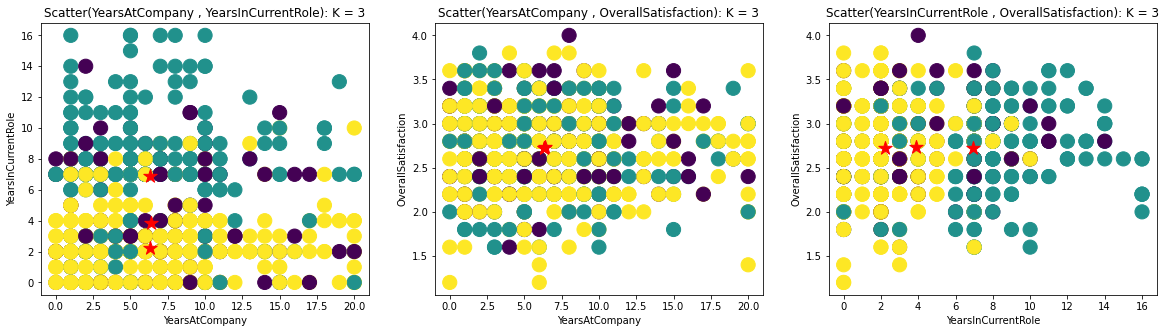

In [35]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "YearsInCurrentRole",  ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "OverallSatisfaction", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "OverallSatisfaction", ax, best_center_index, best_cluster)

plt.show()

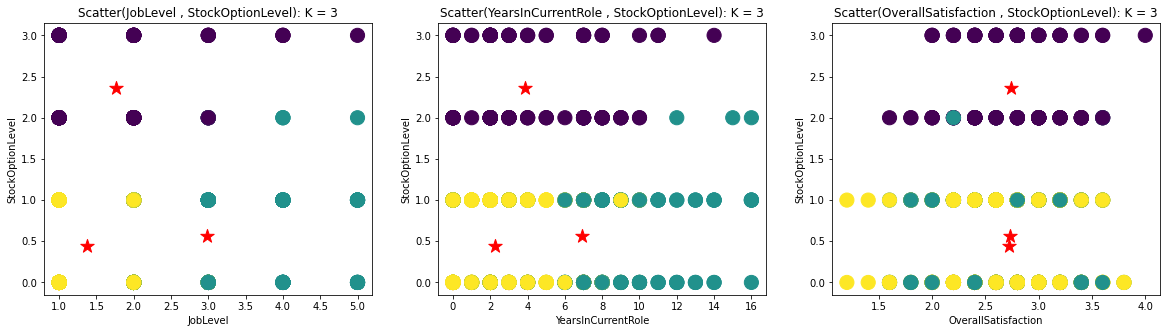

In [36]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("JobLevel", "StockOptionLevel", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsInCurrentRole", "StockOptionLevel", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("OverallSatisfaction", "StockOptionLevel", ax, best_center_index, best_cluster)

plt.show()

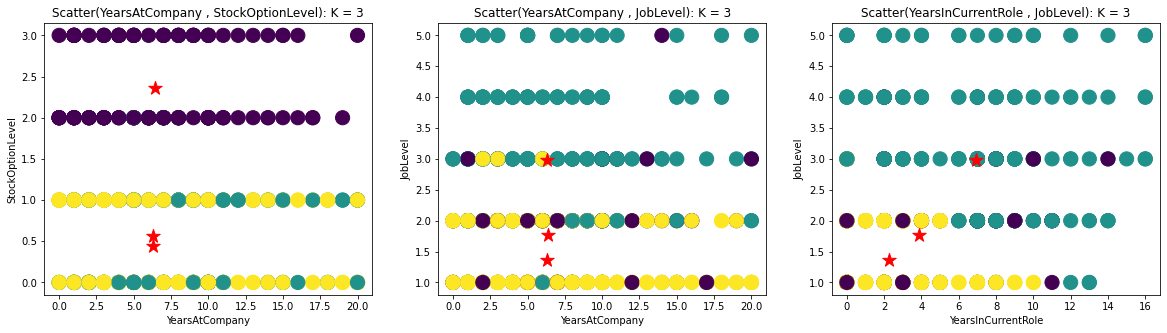

In [37]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "StockOptionLevel",  ax, best_center_index, best_cluster)
 
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "JobLevel", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "JobLevel", ax, best_center_index, best_cluster)


plt.show()

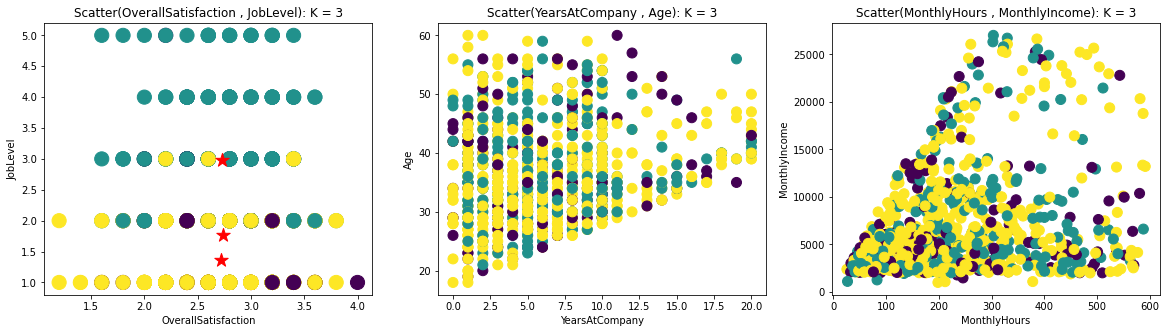

In [38]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("OverallSatisfaction", "JobLevel",  ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_only_clustering("YearsAtCompany", "Age", "", ax, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_only_clustering("MonthlyHours", "MonthlyIncome", "", ax, best_cluster)

plt.show()

<h6> k=4</h6>

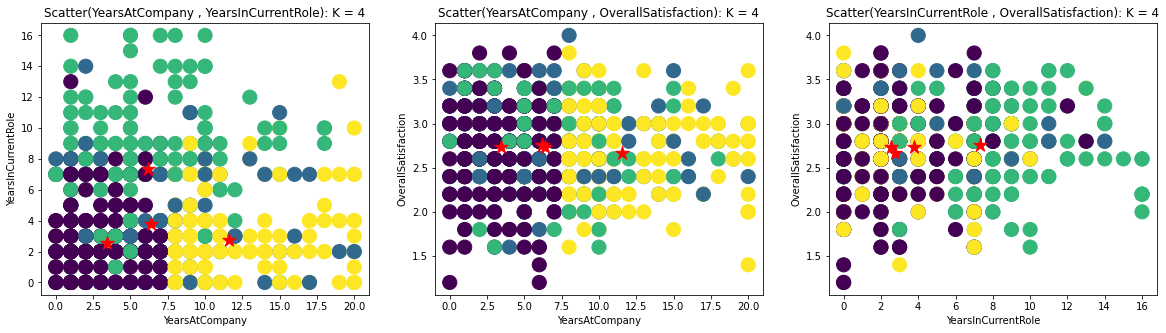

In [39]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "YearsInCurrentRole",  ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "OverallSatisfaction", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "OverallSatisfaction", ax, 2, "C4")

plt.show()

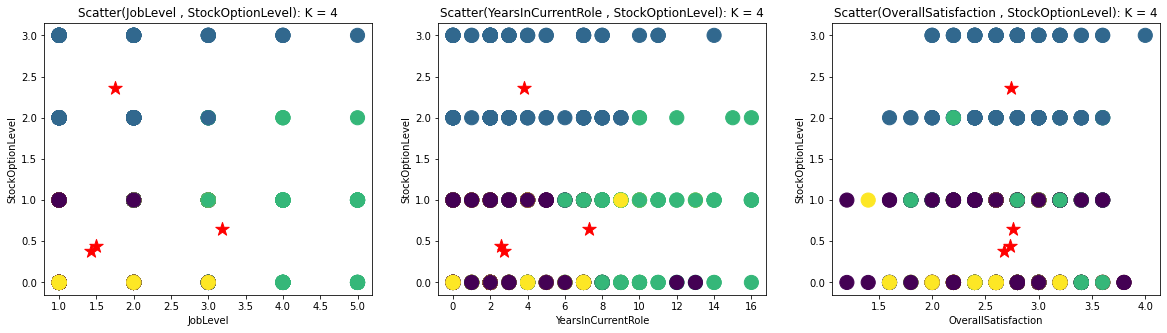

In [40]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("JobLevel", "StockOptionLevel", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsInCurrentRole", "StockOptionLevel", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("OverallSatisfaction", "StockOptionLevel", ax, 2, "C4")

plt.show()

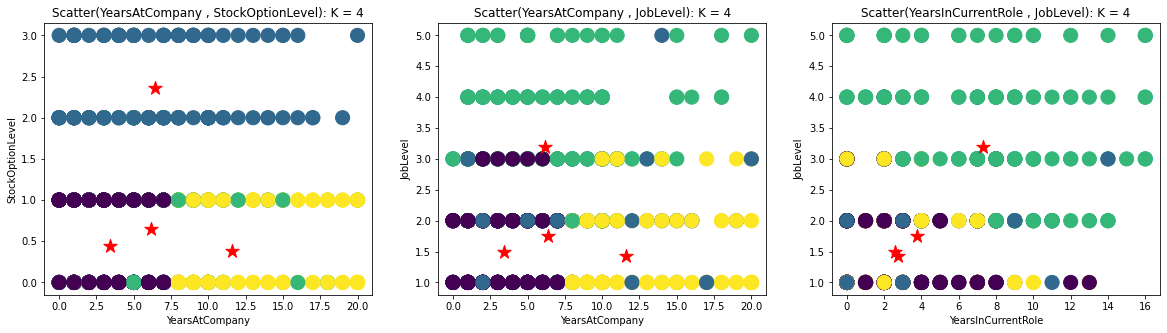

In [41]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "StockOptionLevel",  ax, 2, "C4")
 
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "JobLevel", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "JobLevel", ax, 2, "C4")


plt.show()

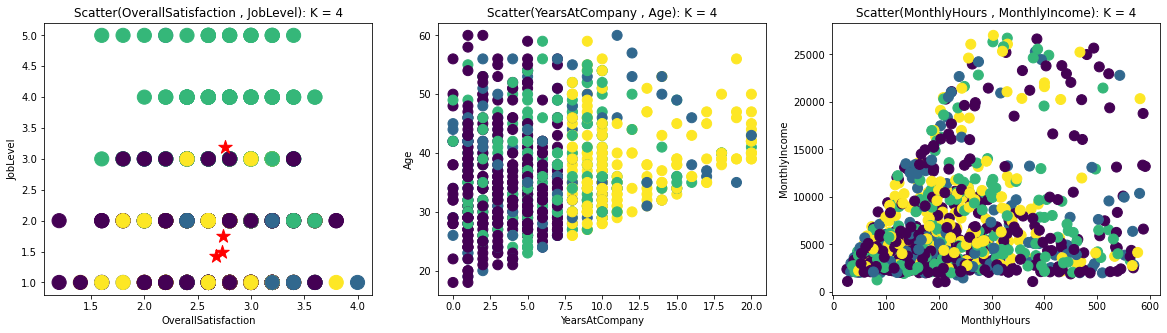

In [42]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("OverallSatisfaction", "JobLevel",  ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_only_clustering("YearsAtCompany", "Age", "", ax, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_only_clustering("MonthlyHours", "MonthlyIncome", "", ax, "C4")

plt.show()

<h6> Centroids visualisation and comparison among different k </h6>

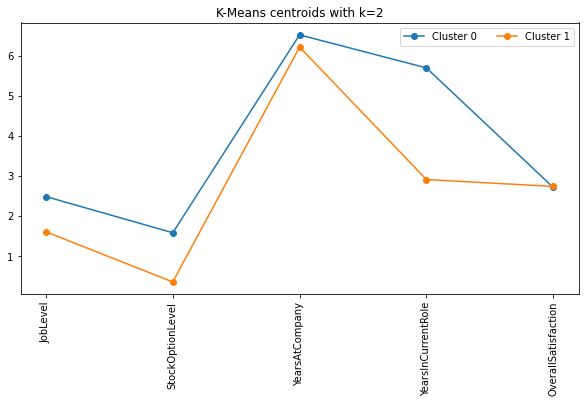

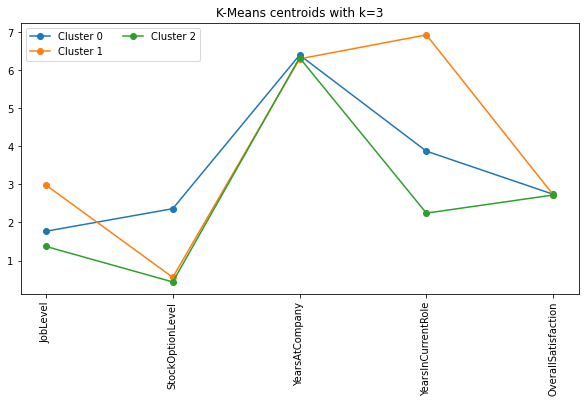

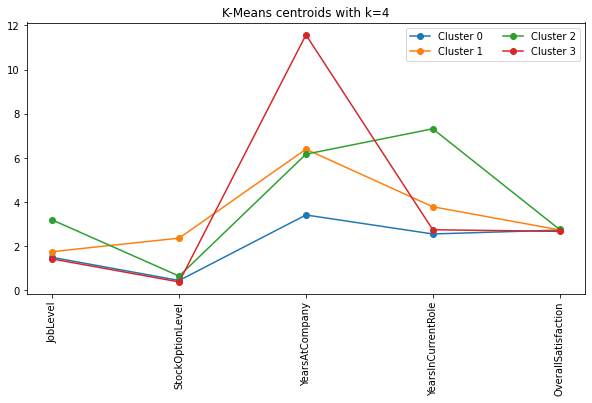

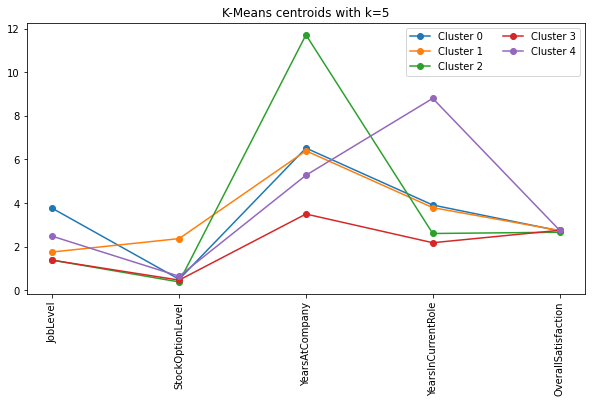

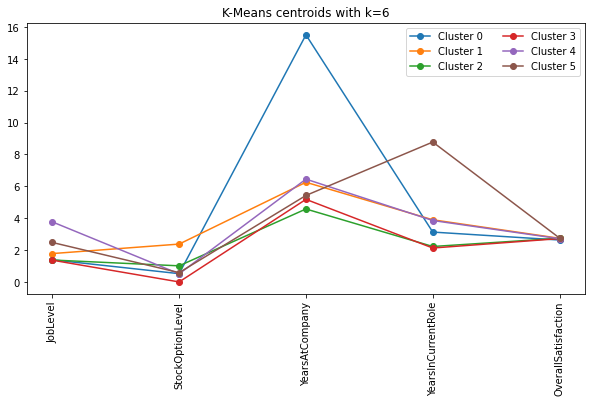

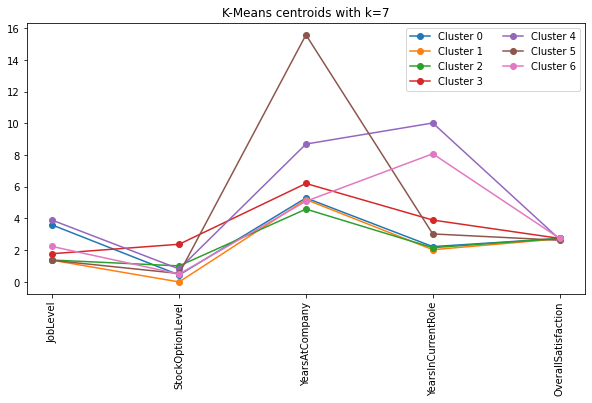

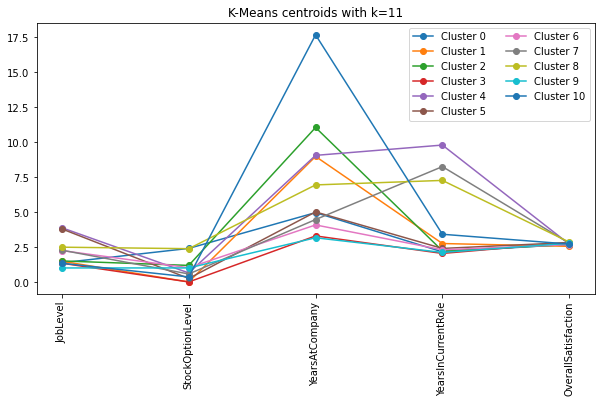

In [43]:
for j in range(0, len(Ks)):
    plt.figure(figsize=(10, 5))
    for i in range(0, Ks[j]):
        plt.plot(centers[j][i], marker='o', label='Cluster %s' % i)

    plt.tick_params(axis='both', which='major')
    plt.xticks(range(0, len(df_probe.columns)), df_probe.columns)
    plt.legend(ncol=2)
    plt.xticks(rotation=90)
    plt.title("K-Means centroids with k=" + str(Ks[j]))
    plt.show()

<h6> Checking where impunted and switched data are </h6>

In [44]:
clust0_impunted = 0
clust1_impunted = 0
clust2_impunted = 0

print("In which cluster are located my impunted records:")
for i in range(0, 3):
    my_index = df_cleaned.index[(df_cleaned["C3"] == i)]
    tmp_df = df_checking.iloc[my_index, :]
    res = 0
    res += int(tmp_df[tmp_df["YearsAtCompanyImpunted"] == 1].shape[0])
    res += int(tmp_df[tmp_df["IncomeImpunted"] == 1].shape[0])
    res += int(tmp_df[tmp_df["AgeImpunted"] == 1].shape[0])

    if res > 0:
        if i == 0:
            clust0_impunted = res
        elif i == 1:
            clust1_impunted = res
        else:
            clust2_impunted = res
    
print("cluster 0 impunted records:", clust0_impunted)
print("cluster 1 impunted records:", clust1_impunted)
print("cluster 2 impunted records:", clust2_impunted)

In which cluster are located my impunted records:
cluster 0 impunted records: 58
cluster 1 impunted records: 118
cluster 2 impunted records: 180


In [45]:
clust0_switched = 0
clust1_switched= 0
clust2_switched = 0

print("In which cluster are located my switched records:")
for i in range(0, 3):
    my_index = df_cleaned.index[(df_cleaned["C3"] == i)]
    tmp_df = df_checking.iloc[my_index, :]
    res = 0
    res += int(tmp_df[tmp_df["Switched"] == 1].shape[0])
    if res > 0:
        if i == 0:
            clust0_switched = res
        elif i == 1:
            clust1_switched = res
        else:
            clust2_switched = res
    
print("cluster 0 switched records:", clust0_switched)
print("cluster 1 switched records:", clust1_switched)
print("cluster 2 switched records:", clust2_switched)

In which cluster are located my switched records:
cluster 0 switched records: 22
cluster 1 switched records: 46
cluster 2 switched records: 64


<h2>Characterization of the obtained clusters</h2>

In [46]:
visual_labels = [[] for _ in range(len(Ks))]
for i in range(len(Ks)):
    for j in range(1,len(centers[i]) + 1):
        visual_labels[i].append('Cluster ' + str(j))

In [47]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
visual_colors = []
for i in range(len(Ks)):
    visual_colors.append(colors[0:Ks[i]])

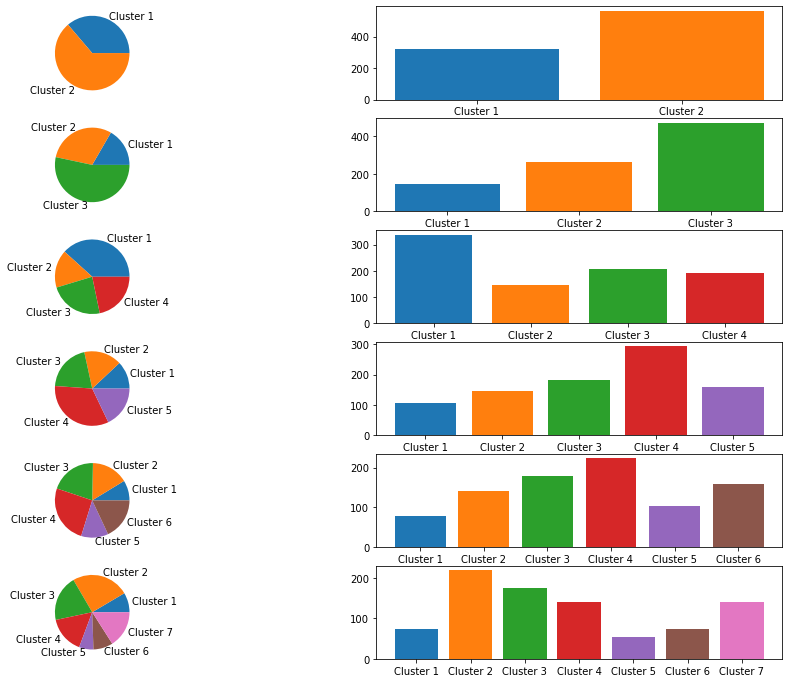

In [48]:
f, axs = plt.subplots(nrows=len(Ks) -1, ncols=2, figsize=(16,12))
for i in range(len(Ks) - 1):
    hist, bins = np.histogram(labels[i], bins=range(0, len(set(labels[i])) + 1))
    axs[i][0].pie(hist, labels=visual_labels[i])
    axs[i][1].bar(list(range(0,len(set(labels[i])))), hist, color=visual_colors[i], tick_label=visual_labels[i])

<h6> k=3 </h6>
We now highlight again the cluster distribution for the case k = 3, since it is confirmed to be the optimal value for the parameter k in k-means algorithm.

Motivare perchè k=3 è il valore ottimale.

In addiction to this distribution visualization, we are going to call back again each single categorical feature to make a complete interpretation of the three clusters.

<BarContainer object of 3 artists>

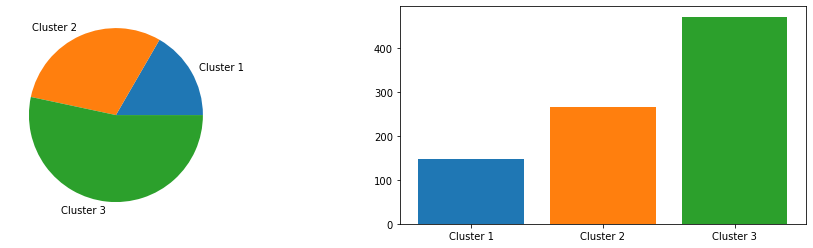

In [49]:
hist, bins = np.histogram(labels[1], bins=range(0, len(set(labels[1])) + 1))
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
axs[0].pie(hist, labels=visual_labels[1])
axs[1].bar(list(range(1,Ks[1]+1)), hist, color=visual_colors[1], tick_label=visual_labels[1])

<b>Classification via categorical attributes</b>
Now we bring up those categorical lables that were excluded from the cluster building process, in order to understand and interpret the results of k-means algorithm.

With k=3 we are able to identintify the group of all leaving employees, without any noise.

In [50]:
def draw_stacked_bar(column_name1, column_name2, df1, df2, annotate_flag, ax, xticks_rotation, loc, cmap, title):
    
    patch_handles = []
    frames = [df1[[column_name1]], df2[[column_name2]]]
    concat_df = pd.concat(frames, axis=1)  # merge Dataframes across columns
    
    # get a frequency table of  column_name1 and column_name2
    pclass_xt = pd.crosstab(concat_df[column_name1], concat_df[column_name2]).dropna()
    if cmap != "":
        patch_handles.append(pclass_xt.plot(kind="bar", stacked=True, ax=ax, cmap=cmap))
    else:
        patch_handles.append(pclass_xt.plot(kind="bar", stacked=True, ax=ax))
    plt.xlabel(column_name1)
    plt.ylabel('count')
    plt.xticks(rotation=xticks_rotation)
    
    # get sub-DataFrame made out by column_name1 and column_name2 concatenation, without NaN values
    curr_df = concat_df[[column_name1, column_name2]].dropna()
    unique_values = sorted(curr_df[column_name1].unique())  # alphabetical order
    tmp_xticks_tot_elements = {}

    # search all of the bar segments and annotate
    for rec in ax.patches:
        height = rec.get_height()
        x = rec.get_x() + rec.get_width() / 2
        y = rec.get_y() + height / 2
        current_value = unique_values[int(x)]  # index with xticks unique column_name1's values
        tot_current_value = curr_df[curr_df[column_name1] == current_value][column_name1].shape[0] 
        percentage =  "{:.0f}%".format(height /tot_current_value*100)

        try:
            tmp_count = tmp_xticks_tot_elements[str(x)]
            tmp_count += height
            tmp_xticks_tot_elements[str(x)] = tmp_count
        except KeyError:
             tmp_xticks_tot_elements[str(x)] = height

        if annotate_flag:
            ax.text(x, y, percentage, ha='center', va='bottom')

    # put total number of elements on top of each bar
    for x, tot_x in tmp_xticks_tot_elements.items():
        ax.text(float(x), tot_x, str(int(tot_x)), ha='center', va='bottom')
        
    # adjust legend's position
    if loc != "":
        plt.legend(title=column_name2, loc=loc)
        
    plt.title(title)

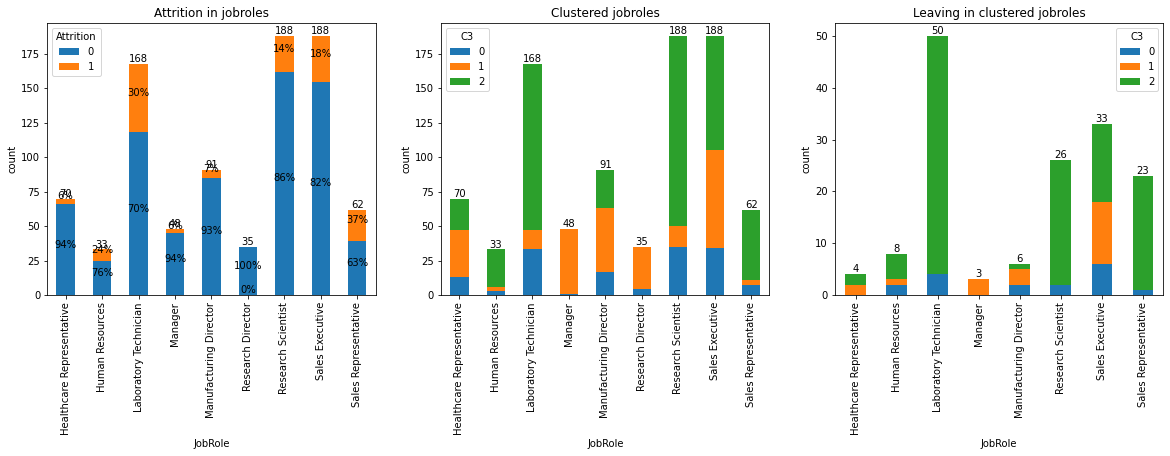

In [51]:
cluster_label = best_cluster
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "Attrition", df_impunted, df_cleaned, True, ax, 90, "", "", "Attrition in jobroles")
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, cluster_label, df_impunted,  df_cleaned, False, ax, 90, "", "", "Clustered jobroles")
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, cluster_label, df_impunted[df_impunted["Attrition"] == "Yes"], 
                 df_cleaned[df_cleaned["Attrition"] == 1], False, ax, 90, "", "", "Leaving in clustered jobroles")

<h6> Cluster 0 insight </h6>

In [52]:
cluster_label = "C3"

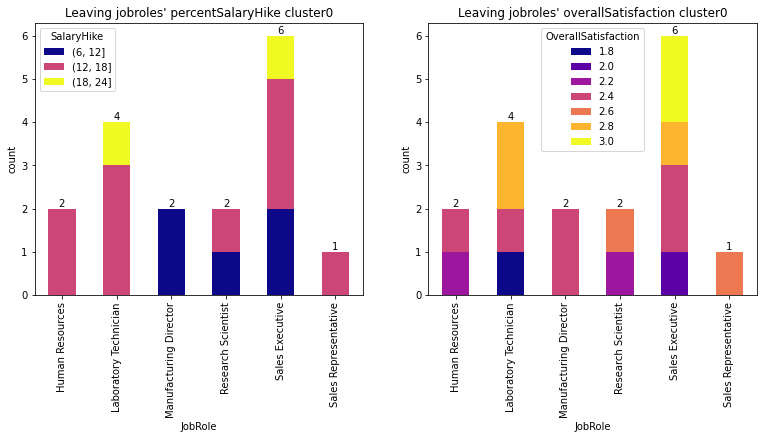

In [53]:
curr_column = "JobRole"
curr_cluster = 0
curr_cmap = "plasma"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

"""ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "StockOptionLevel", 
                 df_impunted[(df_impunted["Attrition"]==1) & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"]==1) & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' stockoptionlevel cluster" + str(curr_cluster))"""
 
ax = plt.subplot2grid(fig_dims, (0, 1))
df_hike = df_impunted.copy()
df_hike["SalaryHike"] = pd.cut(x=df_impunted["PercentSalaryHike"], bins=[6, 12, 18, 24])
draw_stacked_bar(curr_column, "SalaryHike", 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_hike[(df_hike["Attrition"]=="Yes") & (df_hike[cluster_label]==curr_cluster)], 
                 False, ax, 90, "",curr_cmap, "Leaving jobroles' percentSalaryHike cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverallSatisfaction", 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' overallSatisfaction cluster" + str(curr_cluster))
plt.show()

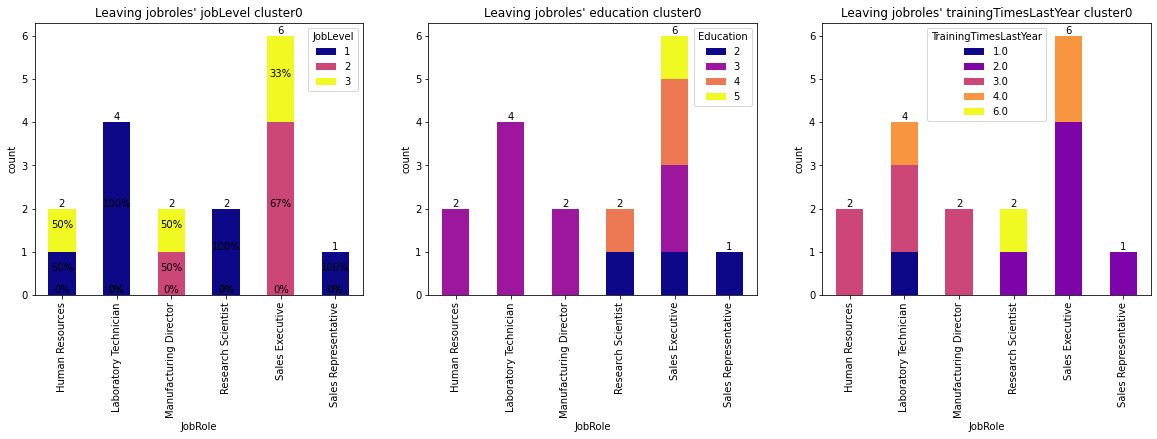

In [54]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobLevel", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                True, ax, 90, "", curr_cmap, "Leaving jobroles' jobLevel cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "Education", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                False, ax, 90, "", curr_cmap, "Leaving jobroles' education cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "TrainingTimesLastYear", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
    False, ax, 90, "upper center", curr_cmap, "Leaving jobroles' trainingTimesLastYear cluster" + str(curr_cluster))

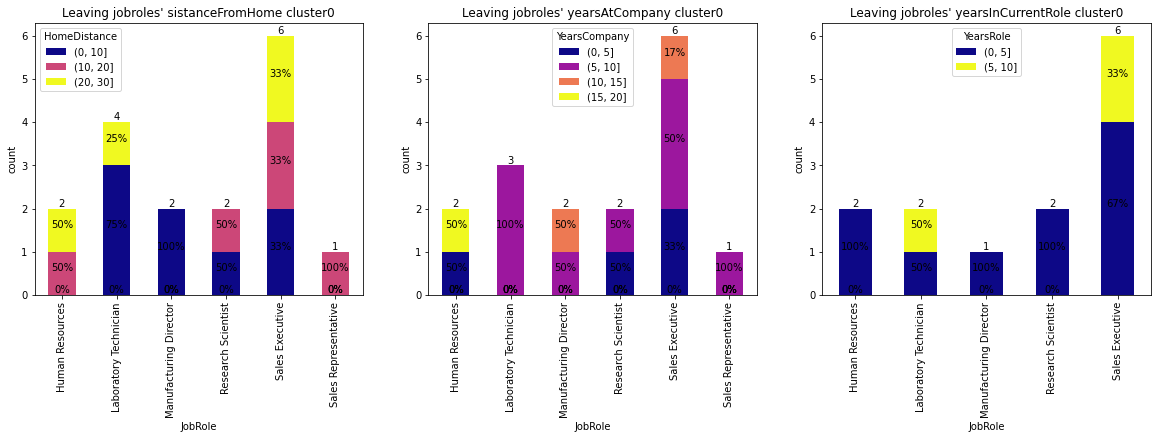

In [55]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_dist = df_impunted.copy()
df_dist["HomeDistance"] = pd.cut(x=df_impunted["DistanceFromHome"], bins=[0, 10, 20, 30])
draw_stacked_bar(curr_column, "HomeDistance", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_dist[(df_dist["Attrition"] == "Yes") & (df_dist[cluster_label]==curr_cluster)], 
                 True, ax, 90, "", curr_cmap, "Leaving jobroles' sistanceFromHome cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
df_yc = df_impunted.copy()
df_yc["YearsCompany"] = pd.cut(x=df_impunted["YearsAtCompany"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsCompany", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_yc[(df_yc["Attrition"] == "Yes") & (df_yc[cluster_label]==curr_cluster)], 
         True, ax, 90, "upper center", curr_cmap, "Leaving jobroles' yearsAtCompany cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
df_yr = df_impunted.copy()
df_yr["YearsRole"] = pd.cut(x=df_impunted["YearsInCurrentRole"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsRole", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_yr[(df_yr["Attrition"] == "Yes") & (df_yr[cluster_label]==curr_cluster)], 
    True, ax, 90, "upper center", curr_cmap, "Leaving jobroles' yearsInCurrentRole cluster" + str(curr_cluster))

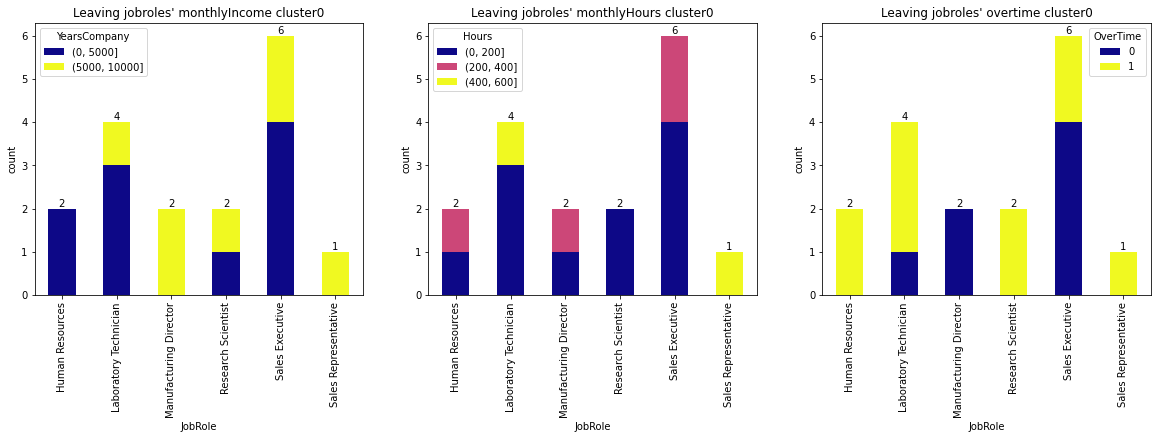

In [56]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_income = df_impunted.copy()
df_income["YearsCompany"] = pd.cut(x=df_impunted["MonthlyIncome"], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])
draw_stacked_bar(curr_column, "YearsCompany", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_income[(df_income["Attrition"] == "Yes") & (df_income[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' monthlyIncome cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
df_h = df_impunted.copy()
df_h["Hours"] = pd.cut(x=df_impunted["MonthlyHours"], bins=[0, 200, 400, 600, 800, 1000])
draw_stacked_bar(curr_column, "Hours",
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_h[(df_h["Attrition"] == "Yes") & (df_h[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' monthlyHours cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverTime", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_cleaned[(df_cleaned["Attrition"] == 1) & (df_cleaned[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' overtime cluster" + str(curr_cluster))

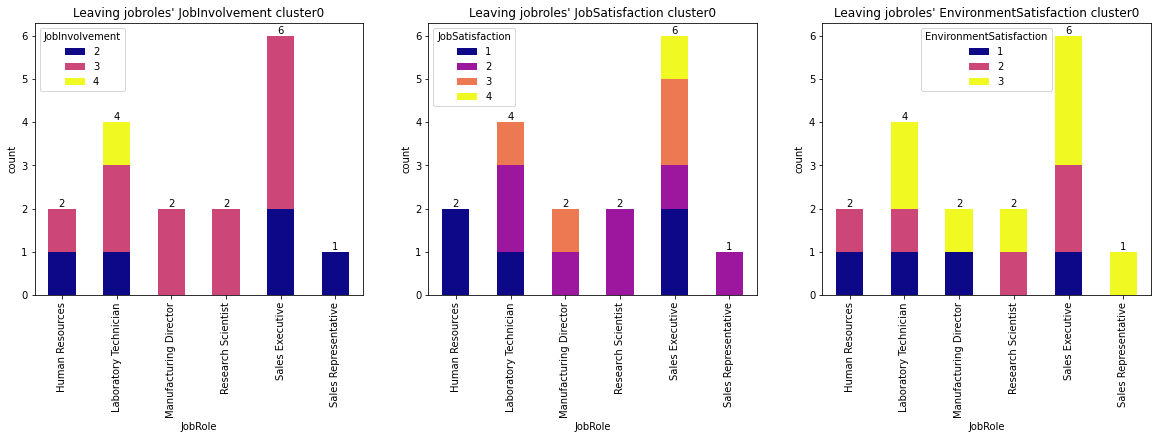

In [57]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobInvolvement", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap,
                                                 "Leaving jobroles' JobInvolvement cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "JobSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap,
                                            "Leaving jobroles' JobSatisfaction cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "EnvironmentSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "upper center", curr_cmap,
                                         "Leaving jobroles' EnvironmentSatisfaction cluster" + str(curr_cluster))

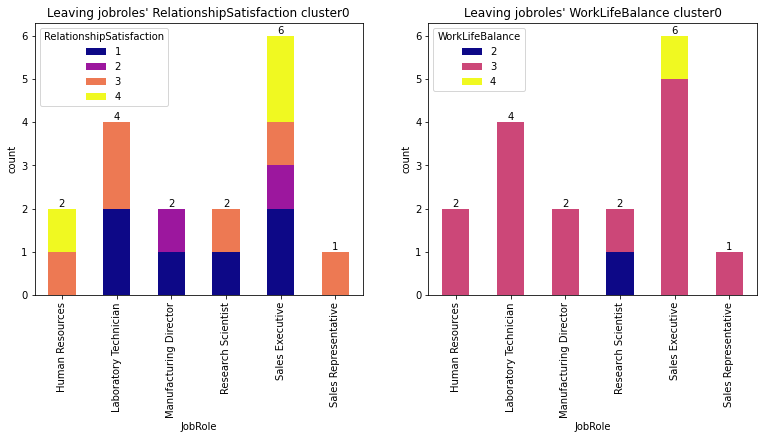

In [58]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "RelationshipSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap,
                                "Leaving jobroles' RelationshipSatisfaction cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "WorkLifeBalance", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap,
                                         "Leaving jobroles' WorkLifeBalance cluster" + str(curr_cluster))

<h6> Cluster 1 insight </h6>

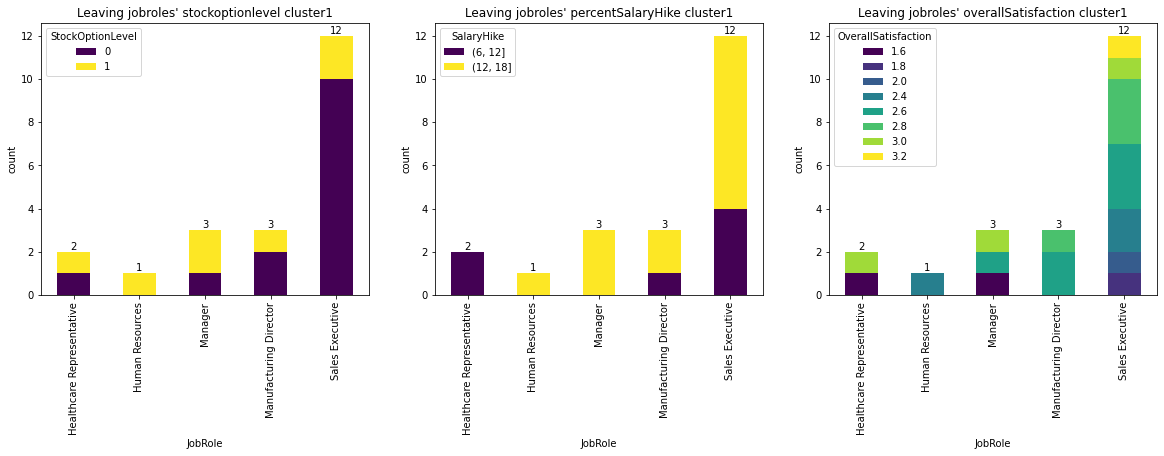

In [59]:
curr_column = "JobRole"
curr_cluster = 1
curr_cmap = "viridis"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "StockOptionLevel", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' stockoptionlevel cluster" + str(curr_cluster))
 
ax = plt.subplot2grid(fig_dims, (0, 1))
df_hike = df_impunted.copy()
df_hike["SalaryHike"] = pd.cut(x=df_impunted["PercentSalaryHike"], bins=[6, 12, 18, 24])
draw_stacked_bar(curr_column, "SalaryHike", 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_hike[(df_hike["Attrition"]=="Yes") & (df_hike[cluster_label]==curr_cluster)], 
                 False, ax, 90, "",curr_cmap, "Leaving jobroles' percentSalaryHike cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverallSatisfaction", 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' overallSatisfaction cluster" + str(curr_cluster))

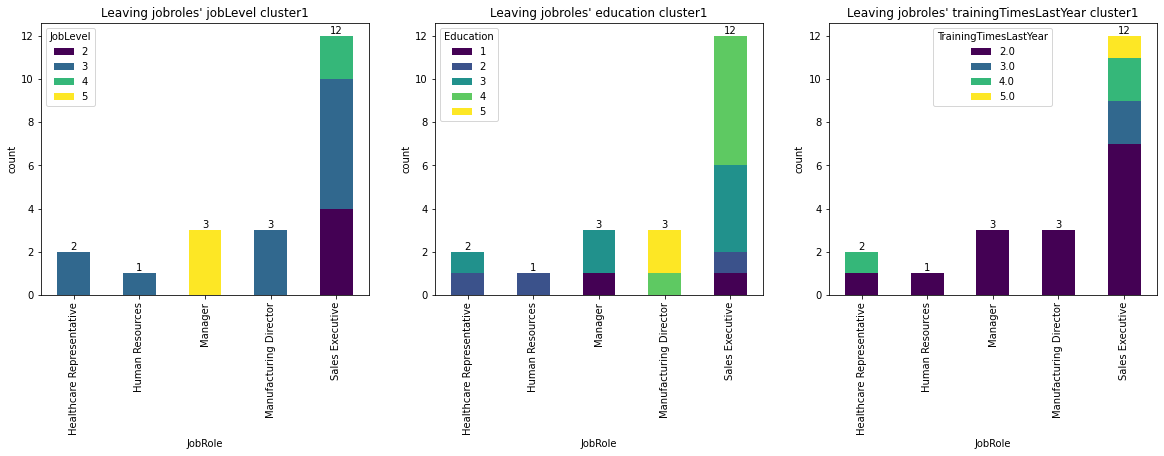

In [60]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobLevel", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                False, ax, 90, "", curr_cmap, "Leaving jobroles' jobLevel cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "Education", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                False, ax, 90, "", curr_cmap, "Leaving jobroles' education cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "TrainingTimesLastYear", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
    False, ax, 90, "upper center", curr_cmap, "Leaving jobroles' trainingTimesLastYear cluster" + str(curr_cluster))

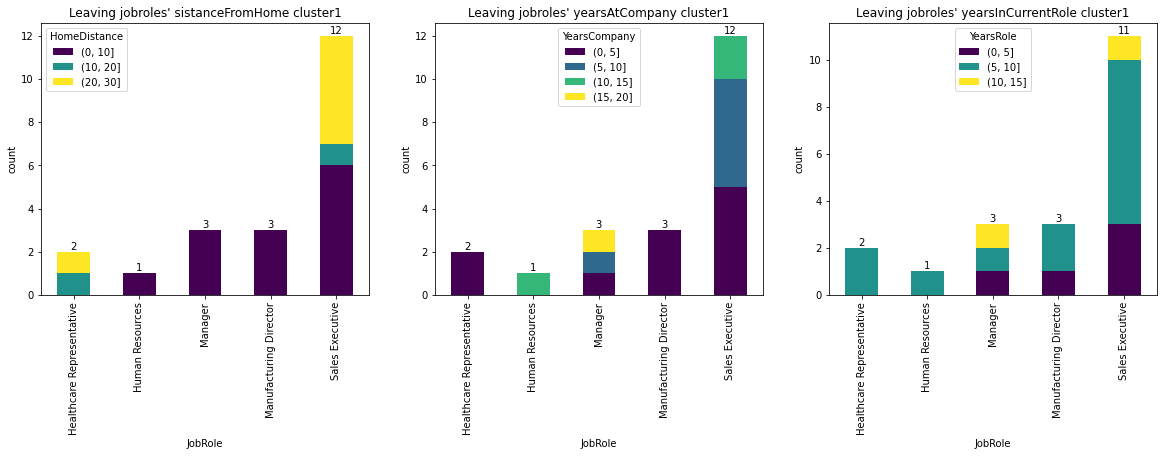

In [61]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_dist = df_impunted.copy()
df_dist["HomeDistance"] = pd.cut(x=df_impunted["DistanceFromHome"], bins=[0, 10, 20, 30])
draw_stacked_bar(curr_column, "HomeDistance", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_dist[(df_dist["Attrition"] == "Yes") & (df_dist[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' sistanceFromHome cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
df_yc = df_impunted.copy()
df_yc["YearsCompany"] = pd.cut(x=df_impunted["YearsAtCompany"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsCompany", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_yc[(df_yc["Attrition"] == "Yes") & (df_yc[cluster_label]==curr_cluster)], 
         False, ax, 90, "upper center", curr_cmap, "Leaving jobroles' yearsAtCompany cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
df_yr = df_impunted.copy()
df_yr["YearsRole"] = pd.cut(x=df_impunted["YearsInCurrentRole"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsRole", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_yr[(df_yr["Attrition"] == "Yes") & (df_yr[cluster_label]==curr_cluster)], 
    False, ax, 90, "upper center", curr_cmap, "Leaving jobroles' yearsInCurrentRole cluster" + str(curr_cluster))

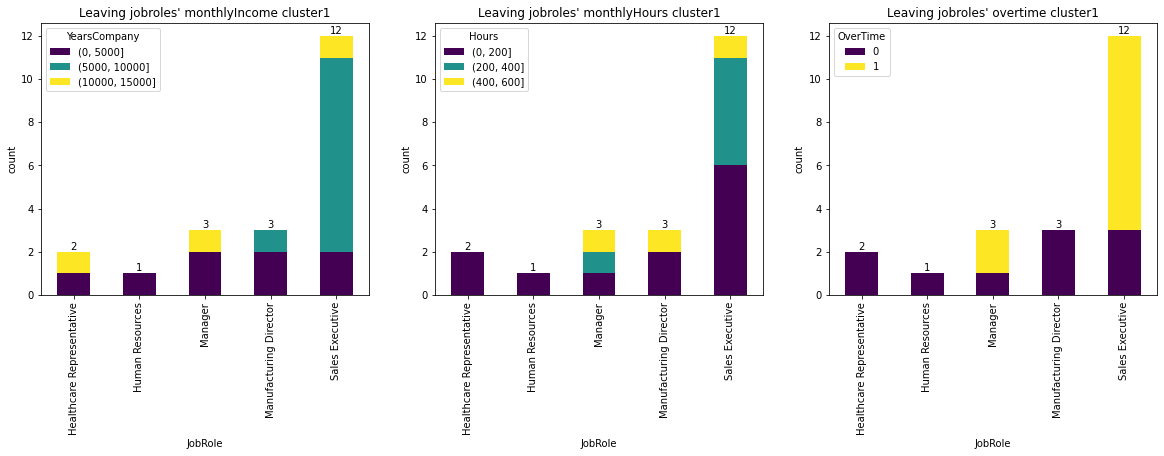

In [62]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_income = df_impunted.copy()
df_income["YearsCompany"] = pd.cut(x=df_impunted["MonthlyIncome"], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])
draw_stacked_bar(curr_column, "YearsCompany", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_income[(df_income["Attrition"] == "Yes") & (df_income[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' monthlyIncome cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
df_h = df_impunted.copy()
df_h["Hours"] = pd.cut(x=df_impunted["MonthlyHours"], bins=[0, 200, 400, 600, 800, 1000])
draw_stacked_bar(curr_column, "Hours",
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_h[(df_h["Attrition"] == "Yes") & (df_h[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' monthlyHours cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverTime", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_cleaned[(df_cleaned["Attrition"] == 1) & (df_cleaned[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' overtime cluster" + str(curr_cluster))

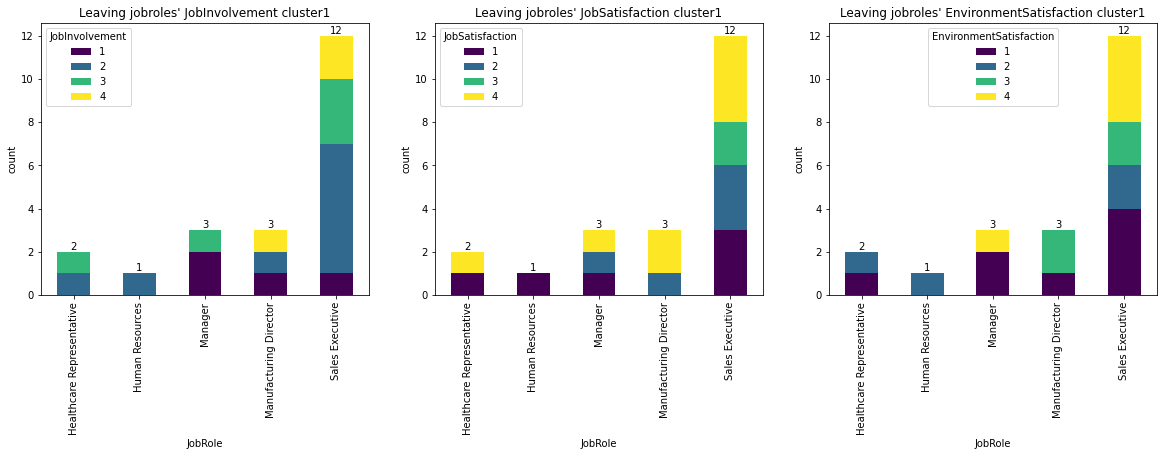

In [63]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobInvolvement", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap,
                                                 "Leaving jobroles' JobInvolvement cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "JobSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap,
                                            "Leaving jobroles' JobSatisfaction cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "EnvironmentSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "upper center", curr_cmap,
                                         "Leaving jobroles' EnvironmentSatisfaction cluster" + str(curr_cluster))

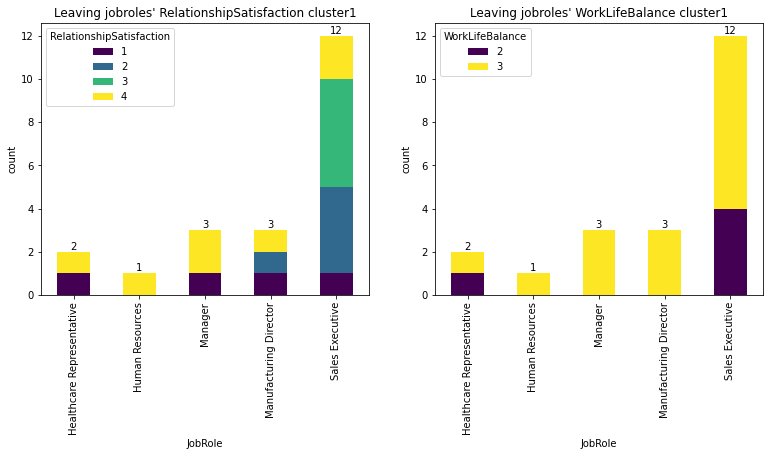

In [64]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "RelationshipSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap,
                                "Leaving jobroles' RelationshipSatisfaction cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "WorkLifeBalance", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap,
                                         "Leaving jobroles' WorkLifeBalance cluster" + str(curr_cluster))

<h6> Cluster 2 insight </h6>

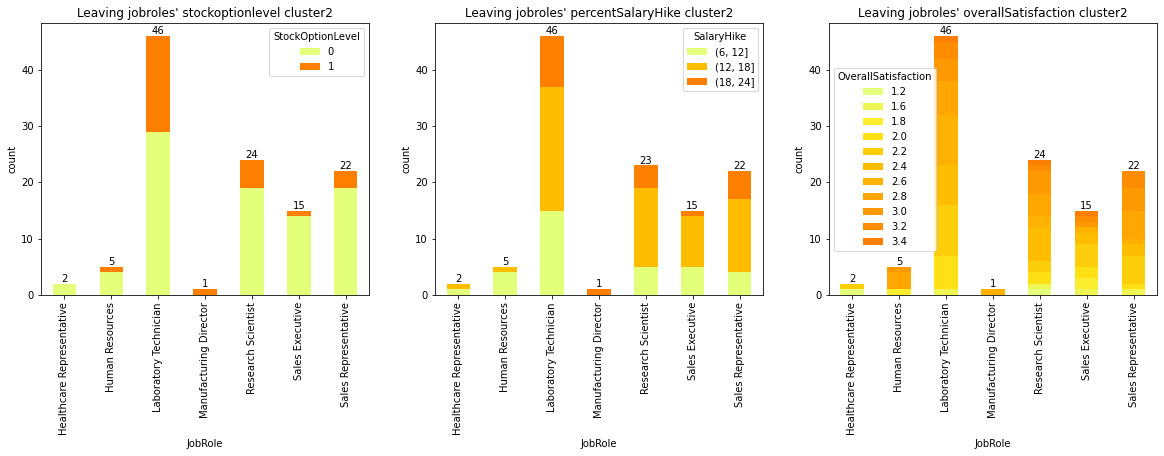

In [65]:
curr_column = "JobRole"
curr_cluster = 2
curr_cmap = "Wistia"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "StockOptionLevel", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' stockoptionlevel cluster" + str(curr_cluster))
 
ax = plt.subplot2grid(fig_dims, (0, 1))
df_hike = df_impunted.copy()
df_hike["SalaryHike"] = pd.cut(x=df_impunted["PercentSalaryHike"], bins=[6, 12, 18, 24])
draw_stacked_bar(curr_column, "SalaryHike", 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_hike[(df_hike["Attrition"]=="Yes") & (df_hike[cluster_label]==curr_cluster)], 
                 False, ax, 90, "",curr_cmap, "Leaving jobroles' percentSalaryHike cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverallSatisfaction", 
                 df_impunted[(df_impunted["Attrition"]=="Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' overallSatisfaction cluster" + str(curr_cluster))

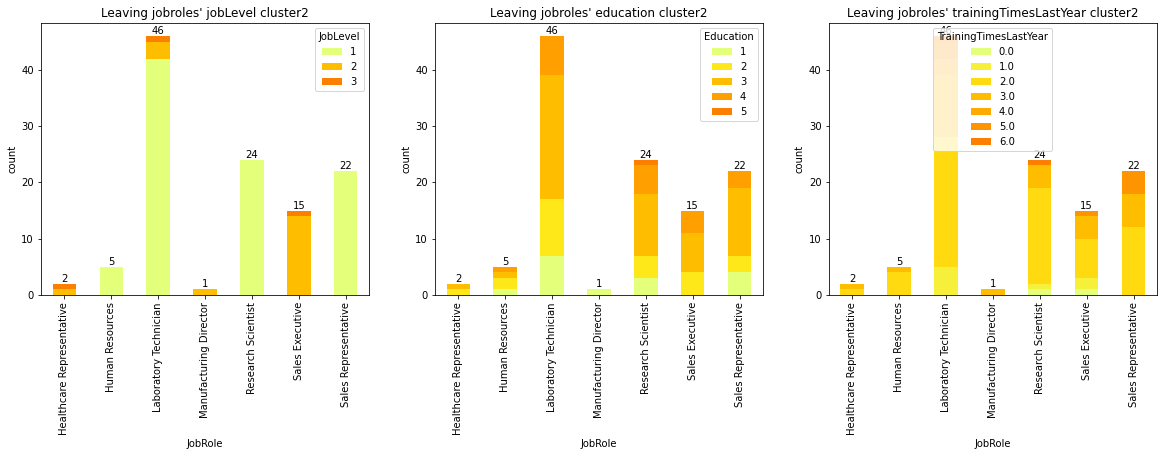

In [66]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobLevel", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                False, ax, 90, "", curr_cmap, "Leaving jobroles' jobLevel cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "Education", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                False, ax, 90, "", curr_cmap, "Leaving jobroles' education cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "TrainingTimesLastYear", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
    False, ax, 90, "upper center", curr_cmap, "Leaving jobroles' trainingTimesLastYear cluster" + str(curr_cluster))

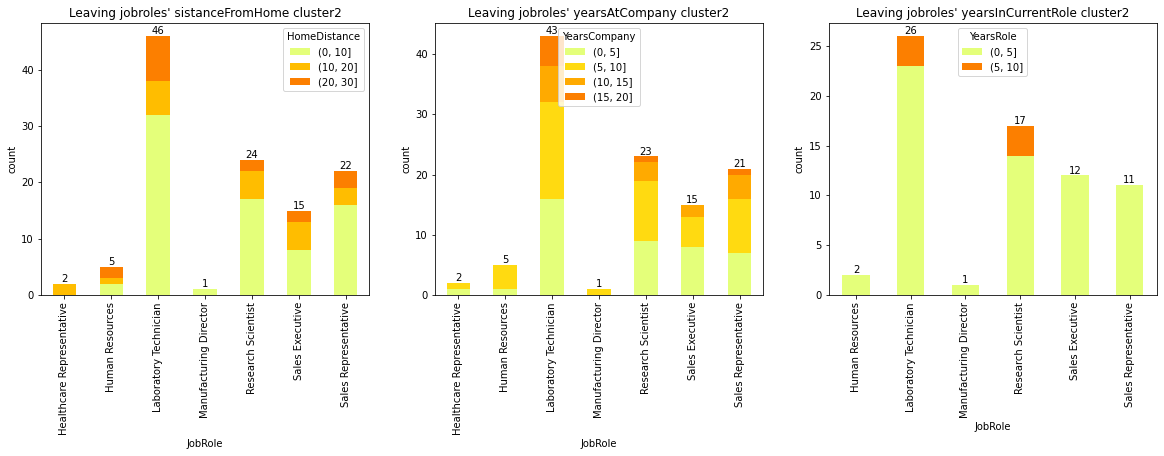

In [67]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_dist = df_impunted.copy()
df_dist["HomeDistance"] = pd.cut(x=df_impunted["DistanceFromHome"], bins=[0, 10, 20, 30])
draw_stacked_bar(curr_column, "HomeDistance", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_dist[(df_dist["Attrition"] == "Yes") & (df_dist[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' sistanceFromHome cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
df_yc = df_impunted.copy()
df_yc["YearsCompany"] = pd.cut(x=df_impunted["YearsAtCompany"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsCompany", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_yc[(df_yc["Attrition"] == "Yes") & (df_yc[cluster_label]==curr_cluster)], 
         False, ax, 90, "upper center", curr_cmap, "Leaving jobroles' yearsAtCompany cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
df_yr = df_impunted.copy()
df_yr["YearsRole"] = pd.cut(x=df_impunted["YearsInCurrentRole"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
draw_stacked_bar(curr_column, "YearsRole", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_yr[(df_yr["Attrition"] == "Yes") & (df_yr[cluster_label]==curr_cluster)], 
    False, ax, 90, "upper center", curr_cmap, "Leaving jobroles' yearsInCurrentRole cluster" + str(curr_cluster))

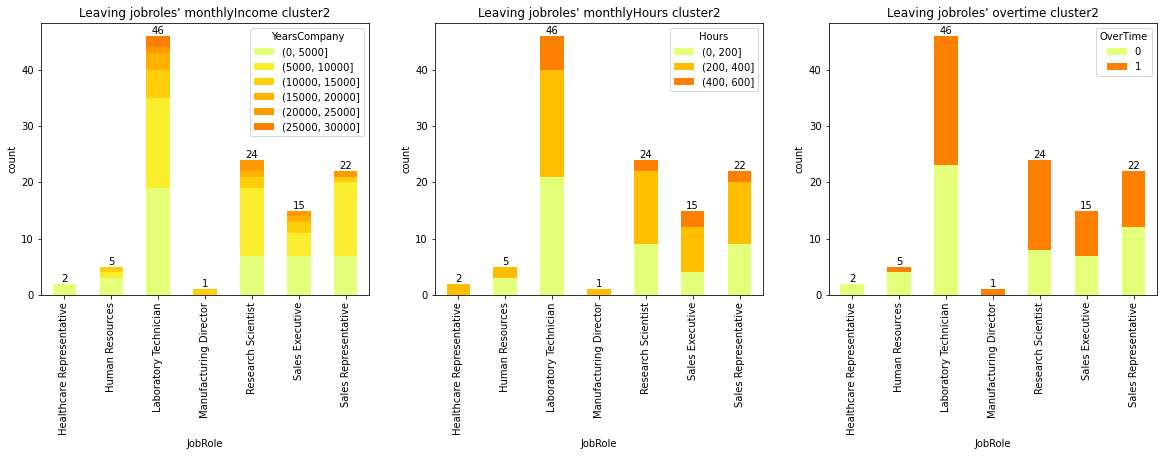

In [68]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
df_income = df_impunted.copy()
df_income["YearsCompany"] = pd.cut(x=df_impunted["MonthlyIncome"], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000])
draw_stacked_bar(curr_column, "YearsCompany", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_income[(df_income["Attrition"] == "Yes") & (df_income[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' monthlyIncome cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 1))
df_h = df_impunted.copy()
df_h["Hours"] = pd.cut(x=df_impunted["MonthlyHours"], bins=[0, 200, 400, 600, 800, 1000])
draw_stacked_bar(curr_column, "Hours",
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_h[(df_h["Attrition"] == "Yes") & (df_h[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' monthlyHours cluster" + str(curr_cluster))

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "OverTime", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_cleaned[(df_cleaned["Attrition"] == 1) & (df_cleaned[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap, "Leaving jobroles' overtime cluster" + str(curr_cluster))

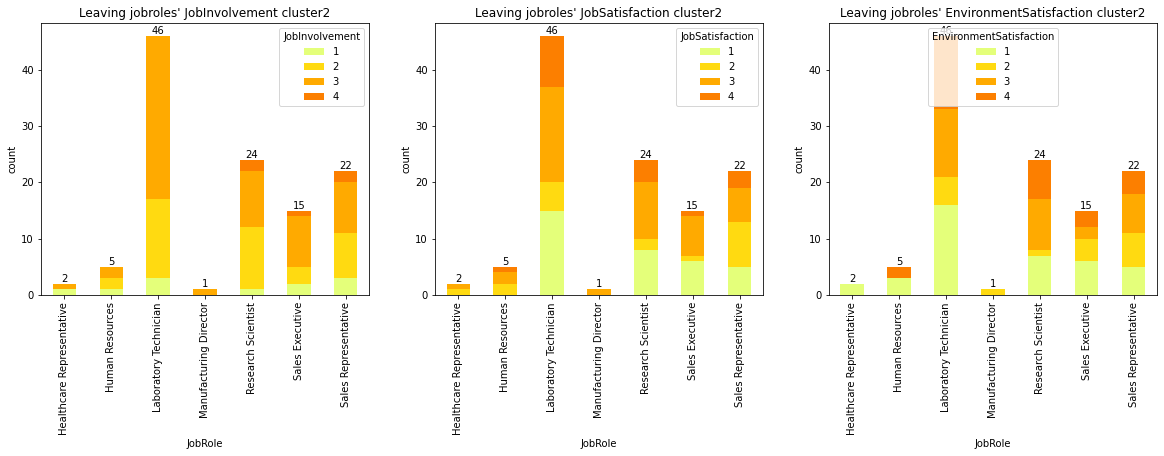

In [69]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "JobInvolvement", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap,
                                                 "Leaving jobroles' JobInvolvement cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "JobSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap,
                                            "Leaving jobroles' JobSatisfaction cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 2))
draw_stacked_bar(curr_column, "EnvironmentSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "upper center", curr_cmap,
                                         "Leaving jobroles' EnvironmentSatisfaction cluster" + str(curr_cluster))

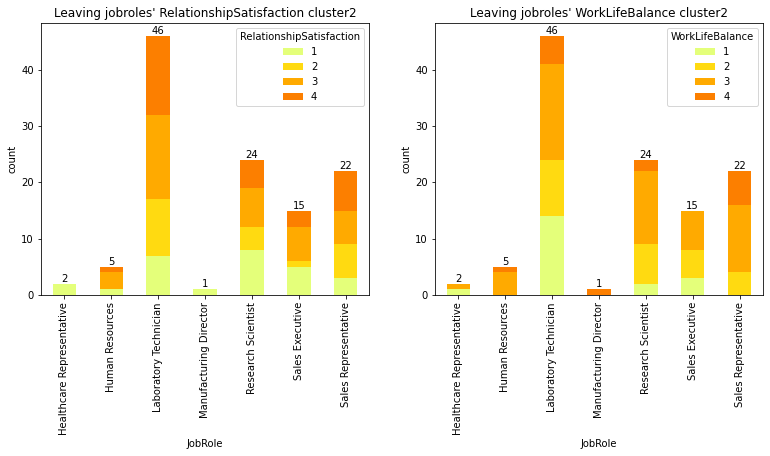

In [70]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_stacked_bar(curr_column, "RelationshipSatisfaction", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 False, ax, 90, "", curr_cmap,
                                "Leaving jobroles' RelationshipSatisfaction cluster" + str(curr_cluster))
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_stacked_bar(curr_column, "WorkLifeBalance", 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)], 
                 df_impunted[(df_impunted["Attrition"] == "Yes") & (df_impunted[cluster_label]==curr_cluster)],
                 False, ax, 90, "", curr_cmap,
                                         "Leaving jobroles' WorkLifeBalance cluster" + str(curr_cluster))

Text(0.5, 1.0, 'Attrition in K-Means')

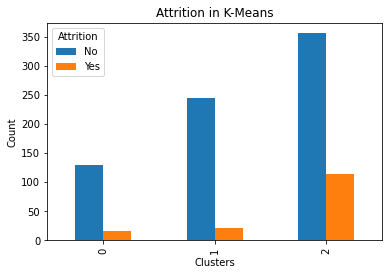

In [71]:
df2 = pd.crosstab(df_impunted["C3"], df_impunted["Attrition"])
df2.plot.bar(stacked=False)
plt.xlabel("Clusters")
plt.ylabel("Count")
plt.title(label="Attrition in " + "K-Means")

Text(0.5, 1.0, 'Yes Attrition in K-Means')

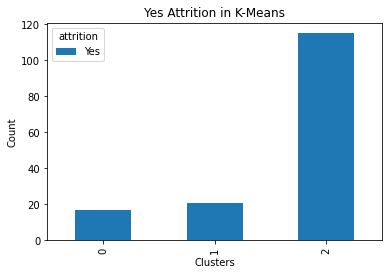

In [72]:
new_df = pd.DataFrame()
new_df["clusters"] = df_impunted[(df_impunted["Attrition"] == "Yes")]["C3"]
new_df["attrition"] = df_impunted[(df_impunted["Attrition"] == "Yes")]["Attrition"]

df2 = pd.crosstab(new_df["clusters"], new_df["attrition"])
df2.plot.bar(stacked=False)
plt.xlabel("Clusters")
plt.ylabel("Count")
plt.title(label="Yes Attrition in " + "K-Means")

In [138]:
def draw_stacked_bar(column_name1, column_name2, df1, df2, annotate_flag, ax, xticks_rotation, loc, cmap, title):
    
    patch_handles = []
    frames = [df1[[column_name1]], df2[[column_name2]]]
    concat_df = pd.concat(frames, axis=1)  # merge Dataframes across columns
    
    # get a frequency table of  column_name1 and column_name2
    pclass_xt = pd.crosstab(concat_df[column_name1], concat_df[column_name2]).dropna()
    if cmap != "":
        patch_handles.append(pclass_xt.plot(kind="bar", stacked=True, ax=ax, cmap=cmap))
    else:
        patch_handles.append(pclass_xt.plot(kind="bar", stacked=True, ax=ax))
    plt.xlabel(column_name1)
    plt.ylabel('count')
    plt.xticks(rotation=xticks_rotation)
    
    # get sub-DataFrame made out by column_name1 and column_name2 concatenation, without NaN values
    curr_df = concat_df[[column_name1, column_name2]].dropna()
    unique_values = sorted(curr_df[column_name1].unique())  # alphabetical order
    tmp_xticks_tot_elements = {}

    # search all of the bar segments and annotate
    for rec in ax.patches:
        height = rec.get_height()
        x = rec.get_x() + rec.get_width() / 2
        y = rec.get_y() + height / 2
        current_value = unique_values[int(x)]  # index with xticks unique column_name1's values
        tot_current_value = curr_df[curr_df[column_name1] == current_value][column_name1].shape[0] 
        percentage =  "{:.0f}%".format(height /tot_current_value*100)

        try:
            tmp_count = tmp_xticks_tot_elements[str(x)]
            tmp_count += height
            tmp_xticks_tot_elements[str(x)] = tmp_count
        except KeyError:
             tmp_xticks_tot_elements[str(x)] = height

        if annotate_flag:
            ax.text(x, y, percentage, ha='center', va='bottom')

    # put total number of elements on top of each bar
    for x, tot_x in tmp_xticks_tot_elements.items():
        ax.text(float(x), tot_x, str(int(tot_x)), ha='center', va='bottom')
        
    # adjust legend's position
    if loc != "":
        plt.legend(title=column_name2, loc=loc)
        
    plt.title(title)

In [151]:
from scipy.spatial.distance import euclidean, pdist, squareform

def similarity_func(u, v):
    """
    Distance == similarity
    """ 
    return 1 / (1 + euclidean(u,v))

In [152]:
df_cleaned_norm = pd.read_csv(num_norm_TR_file, sep=",")

del df_cleaned_norm["Age"]
del df_cleaned_norm["DistanceFromHome"]
del df_cleaned_norm["MonthlyIncome"]
del df_cleaned_norm["PercentSalaryHike"]
del df_cleaned_norm["TrainingTimesLastYear"]
del df_cleaned_norm["MonthlyHours"]
del df_cleaned_norm["OverTime"]
del df_cleaned_norm["Education"]
del df_cleaned_norm["NumCompaniesWorked"]

df_cleaned_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StockOptionLevel     883 non-null    float64
 1   YearsAtCompany       883 non-null    float64
 2   YearsInCurrentRole   883 non-null    float64
 3   Attrition            883 non-null    float64
 4   OverallSatisfaction  883 non-null    float64
 5   JobLevel             883 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


In [153]:
# Euclidean Similarity Matrix
dists = pdist(df_cleaned_norm, similarity_func)
DF_euclid = pd.DataFrame(squareform(dists), columns=df_cleaned_norm.index, index=df_cleaned_norm.index)
for i in range(0, len(df_cleaned_norm)):
    DF_euclid.iloc[i, i] = 1.0
DF_euclid

,0,1,2,3,4,5,6,7,8,9,...,873,874,875,876,877,878,879,880,881,882
0,1.000000,0.588850,0.605963,0.641430,0.593590,0.442971,0.605044,0.534878,0.633824,0.646104,...,0.520753,0.452729,0.482809,0.796844,0.454747,0.444443,0.477282,0.489804,0.679410,0.752950
1,0.588850,1.000000,0.542923,0.485279,0.444220,0.434334,0.471375,0.524805,0.508354,0.571429,...,0.476060,0.401038,0.483124,0.522150,0.379462,0.379441,0.407606,0.418699,0.524143,0.507919
2,0.605963,0.542923,1.000000,0.642224,0.609273,0.575946,0.628551,0.750000,0.716688,0.723354,...,0.645030,0.467369,0.561236,0.613214,0.431036,0.451674,0.511613,0.450496,0.659158,0.604340
3,0.641430,0.485279,0.642224,1.000000,0.634696,0.475290,0.660750,0.554847,0.657534,0.697821,...,0.583514,0.472259,0.484176,0.719159,0.458026,0.455842,0.473443,0.474909,0.714186,0.680639
4,0.593590,0.444220,0.609273,0.634696,1.000000,0.476966,0.676521,0.536797,0.699244,0.557921,...,0.541064,0.472663,0.473135,0.656501,0.482416,0.498062,0.567131,0.469789,0.647601,0.696858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.444443,0.379441,0.451674,0.455842,0.498062,0.401713,0.471155,0.426569,0.477161,0.431399,...,0.430451,0.662145,0.398872,0.460955,0.710059,1.000000,0.444094,0.622575,0.466133,0.473528
879,0.477282,0.407606,0.511613,0.473443,0.567131,0.533153,0.607516,0.527840,0.498439,0.479882,...,0.542923,0.450496,0.548081,0.503877,0.442006,0.444094,1.000000,0.420484,0.485428,0.527389
880,0.489804,0.418699,0.450496,0.474909,0.469789,0.386421,0.472524,0.425620,0.460842,0.461182,...,0.428974,0.641884,0.405328,0.498756,0.700583,0.622575,0.420484,1.000000,0.471375,0.495380
881,0.679410,0.524143,0.659158,0.714186,0.647601,0.478941,0.659100,0.563363,0.750000,0.661550,...,0.582586,0.475819,0.498274,0.697743,0.461184,0.466133,0.485428,0.471375,1.000000,0.729048


In [154]:
zerocluster = []
onecluster = []
minuscluster = []

i = 0
for row in df_cleaned.itertuples():
    if row.C3 == 1:
        zerocluster.append(i)
    elif row.C3 == 2:
        onecluster.append(i)
    elif row.C3 == 0:
        minuscluster.append(i)
    i += 1
    
cluster_matrix_indexes = sorted(minuscluster) + sorted(zerocluster) + sorted(onecluster)
cluster_matrix_columns = cluster_matrix_indexes

In [155]:
# Cluster Similarity Matrix
DF_cluster = pd.DataFrame(0, columns=cluster_matrix_columns, index=cluster_matrix_indexes)

min_len = len(minuscluster)
for i in range(0, min_len):
    for j in range(0, min_len):
        DF_cluster.iloc[i, j] = 1
        
min_and_zero_len = min_len + len(zerocluster)
for i in range(min_len, min_and_zero_len):
    for j in range(min_len, min_and_zero_len):
        DF_cluster.iloc[i, j] = 1

min_and_zero_and_one_len = min_and_zero_len + len(onecluster)
for i in range(min_and_zero_len, min_and_zero_and_one_len):
    for j in range(min_and_zero_len, min_and_zero_and_one_len):
        DF_cluster.iloc[i, j] = 1

DF_cluster 

,5,7,17,19,20,32,34,42,45,47,...,865,866,869,870,871,874,877,878,881,882
5,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
17,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
20,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
877,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
878,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
881,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [156]:
# rearange Euclidean Similarity Matrix according to Cluster Similarity Matrix
DF_euclid_new = pd.DataFrame(0, columns=cluster_matrix_columns, index=cluster_matrix_indexes)

for c in list(DF_cluster.columns):
    dist_column = DF_euclid[c]
    dist_zerocluster = []
    dist_onecluster = []
    dist_minuscluster = []
    
    i = 0
    for d in dist_column:
        if i in zerocluster:
            dist_zerocluster.append(d)
        elif i in onecluster:
            dist_onecluster.append(d)
        elif i in minuscluster:
            dist_minuscluster.append(d)
        i += 1

    new_dist_column = dist_minuscluster + dist_zerocluster + dist_onecluster
    DF_euclid_new[c] = new_dist_column

DF_euclid_new

,5,7,17,19,20,32,34,42,45,47,...,865,866,869,870,871,874,877,878,881,882
5,1.000000,0.686384,0.509781,0.599883,0.679623,0.637006,0.592664,0.629225,0.641711,0.656501,...,0.479585,0.593255,0.528512,0.584112,0.561236,0.438060,0.385842,0.401713,0.478941,0.458775
7,0.686384,1.000000,0.592309,0.696858,0.686384,0.698525,0.682338,0.686384,0.737715,0.881345,...,0.569552,0.653447,0.613733,0.723354,0.606095,0.457167,0.409713,0.426569,0.563363,0.533930
17,0.509781,0.592309,1.000000,0.729384,0.544024,0.620204,0.742591,0.627464,0.637179,0.596188,...,0.513049,0.501845,0.591076,0.538035,0.525666,0.438957,0.415161,0.402909,0.516053,0.554103
19,0.599883,0.696858,0.729384,1.000000,0.679410,0.759604,0.952381,0.761905,0.716688,0.690391,...,0.569925,0.586120,0.637675,0.617907,0.622575,0.469789,0.429483,0.423738,0.570972,0.581114
20,0.679623,0.686384,0.544024,0.679410,1.000000,0.757486,0.666597,0.738796,0.641711,0.656501,...,0.583179,0.667627,0.569028,0.652063,0.710059,0.477110,0.422590,0.428854,0.581737,0.540100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0.438060,0.457167,0.438957,0.469789,0.477110,0.478941,0.470034,0.479734,0.466979,0.449088,...,0.470402,0.480733,0.466059,0.470787,0.496837,1.000000,0.674157,0.662145,0.475819,0.476012
877,0.385842,0.409713,0.415161,0.429483,0.422590,0.433377,0.432116,0.436471,0.432359,0.402388,...,0.450408,0.446208,0.451475,0.433537,0.464484,0.674157,1.000000,0.710059,0.461184,0.486047
878,0.401713,0.426569,0.402909,0.423738,0.428854,0.434334,0.424899,0.435975,0.443113,0.417391,...,0.457045,0.473781,0.455408,0.458775,0.468723,0.662145,0.710059,1.000000,0.466133,0.473528
881,0.478941,0.563363,0.516053,0.570972,0.581737,0.597327,0.567229,0.594059,0.556780,0.548842,...,0.894515,0.645978,0.570641,0.674812,0.691391,0.475819,0.461184,0.466133,1.000000,0.729048


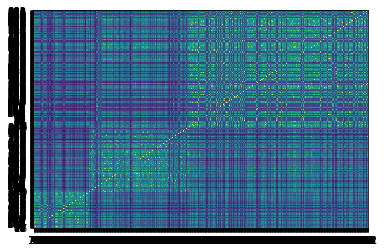

In [157]:
plt.pcolor(DF_euclid_new)
plt.yticks(np.arange(0.5, len(DF_euclid_new.index), 1), DF_euclid_new.index)
plt.xticks(np.arange(0.5, len(DF_euclid_new.columns), 1), DF_euclid_new.columns)
plt.show()

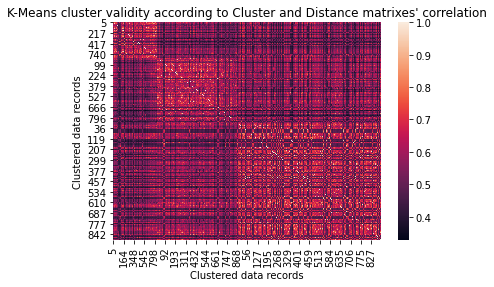

In [158]:
sns.heatmap(DF_euclid_new, annot=False)
plt.xlabel("Clustered data records")
plt.ylabel("Clustered data records")
plt.title("K-Means cluster validity according to Cluster and Distance matrixes' correlation")
plt.show()

In [159]:
print(len(minuscluster))
print(len(zerocluster))
print(len(onecluster))

147
265
471


<h6> Contincengy matrixes </h6>
A contincengy matrix is a 2x2 matrix having the followinf format:

|  | Same Cluster | Different clusters |
| --- | --- | --- |
| Same Class  | f11 | f10 |
| Different Class | f01 | f00 |

where:
- f11 = number of elements of given class in examinated cluster;
- f10 = number of elements of given class in other clusters;
- f01 = number of elements of other classes in examinated cluster;
- f00 = number of elements of other classes in other clusters.

With the contincengy matrix we can derive useful external indexes to validate cluster's goodness:
- $$Jaccard similarity = \dfrac{f11}{f11 + f10 + f01}$$
- $$F1 measure = \dfrac{2*precision*recall}{precision + recall}$$
 with:
 - $$precision = \dfrac{f11}{f11 + f01}$$
 - $$recall = \dfrac{f11}{f11 + f10}$$

In [160]:
clust = 0
f11 = df_impunted[(df_impunted["C3"] == clust) & (df_impunted["Attrition"] == "Yes")].shape[0]
f10 = df_impunted[(df_impunted["C3"] == clust) & (df_impunted["Attrition"] == "No")].shape[0]
f01 = df_impunted[(df_impunted["C3"] != clust) & (df_impunted["Attrition"] == "Yes")].shape[0]
f00 = df_impunted[(df_impunted["C3"] != clust) & (df_impunted["Attrition"] == "No")].shape[0]

print("Contingency table for clust " + str(clust))
print(f11, f01, sep="\t")
print(f10, f00, sep="\t")

rand = (f00 + f01) / (f00 + f01 + f10 + f11)
jaccard = f11 / (f11 + f10 + f01)
precision = f11 / (f11 + f10)
recall = f11 / (f11 + f01)
f_measure = (2*precision*recall) / (precision + recall)
print("Rand statistic = ", rand)
print("Jaccard coefficient = ", jaccard)
print("F-measure = ", f_measure)

Contingency table for clust 0
17	136
130	600
Rand statistic =  0.8335220838052095
Jaccard coefficient =  0.06007067137809187
F-measure =  0.11333333333333331


In [161]:
clust = 1
f11 = df_impunted[(df_impunted["C3"] == clust) & (df_impunted["Attrition"] == "Yes")].shape[0]
f10 = df_impunted[(df_impunted["C3"] == clust) & (df_impunted["Attrition"] == "No")].shape[0]
f01 = df_impunted[(df_impunted["C3"] != clust) & (df_impunted["Attrition"] == "Yes")].shape[0]
f00 = df_impunted[(df_impunted["C3"] != clust) & (df_impunted["Attrition"] == "No")].shape[0]

print("Contingency table for clust " + str(clust))
print(f11, f01, sep="\t")
print(f10, f00, sep="\t")

rand = (f00 + f01) / (f00 + f01 + f10 + f11)
jaccard = f11 / (f11 + f10 + f01)
precision = f11 / (f11 + f10)
recall = f11 / (f11 + f01)
f_measure = (2*precision*recall) / (precision + recall)
print("Rand statistic = ", rand)
print("Jaccard coefficient = ", jaccard)
print("F-measure = ", f_measure)

Contingency table for clust 1
21	132
244	486
Rand statistic =  0.6998867497168743
Jaccard coefficient =  0.05289672544080604
F-measure =  0.10047846889952154


In [162]:
clust = 2
f11 = df_impunted[(df_impunted["C3"] == clust) & (df_impunted["Attrition"] == "Yes")].shape[0]
f10 = df_impunted[(df_impunted["C3"] == clust) & (df_impunted["Attrition"] == "No")].shape[0]
f01 = df_impunted[(df_impunted["C3"] != clust) & (df_impunted["Attrition"] == "Yes")].shape[0]
f00 = df_impunted[(df_impunted["C3"] != clust) & (df_impunted["Attrition"] == "No")].shape[0]

print("Contingency table for clust " + str(clust))
print(f11, f01, sep="\t")
print(f10, f00, sep="\t")

rand = (f00 + f01) / (f00 + f01 + f10 + f11)
jaccard = f11 / (f11 + f10 + f01)
precision = f11 / (f11 + f10)
recall = f11 / (f11 + f01)
f_measure = (2*precision*recall) / (precision + recall)
print("Rand statistic = ", rand)
print("Jaccard coefficient = ", jaccard)
print("F-measure = ", f_measure)

Contingency table for clust 2
115	38
356	374
Rand statistic =  0.4665911664779162
Jaccard coefficient =  0.22593320235756384
F-measure =  0.36858974358974356
